<h2 align="center" style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Forecasting Stock Prices using Sentiment Analysis and Time Series Models: An Advanced Data Analytics Approach</h2>

### **Table of Contents**

- [Introduction](#Introduction)  
  - [Assessment Overview](#Assessment-Overview)  
  - [Focus](#Focus)  
  - [Data Source and Storage](#Data-Source-and-Storage)  
  - [Key Findings](#Key-Findings)  
- [Install and Import Required Libraries](#Install-and-Import-Required-Libraries)  
- [Load Dataset](#Load-Dataset)  
  - [Initialize Spark Session and Define Data Paths](#Initialize-Spark-Session-and-Define-Data-Paths)  
  - [Define Data Schemas](#Define-Data-Schemas)  
  - [Define Helper Functions for Loading Data](#Define-Helper-Functions-for-Loading-Data)  
  - [Load Datasets using Helper Functions](#Load-Datasets-using-Helper-Functions)  
- [Data Exploration](#Data-Exploration)  
  - [Viewing First 5 Rows of Each Stock DataFrame](#Viewing-First-5-Rows-of-Each-Stock-DataFrame)  
  - [Statistical Summary of Each Stock DataFrame](#Statistical-Summary-of-Each-Stock-DataFrame)  
  - [Checking for Missing Values](#Checking-for-Missing-Values)  
  - [Explore tweet data](#Explore-tweet-data)  
  - [Data Exploration Summary](#Data-Exploration-Summary)  
- [Data Preprocessing](#Data-Preprocessing)  
- [Store Data to SQL Database](#Store-Data-to-SQL-Database)
- [Comparative Analysis of SQL and NOSQL Database](#Comparative-Analysis-of-SQL-and-NOSQL-Database)
- [Working with Pandas DataFrame](#Working-with-Pandas-DataFrame)  
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)  
  - [Closing Prices of Stocks](#Closing-Prices-of-Stocks)  
  - [Tweet WordCloud](#Tweet-WordCloud)  
- [Sentiment Analysis](#Sentiment-Analysis)  
  - [Data Preprocessing for Sentiment Analysis](#Data-Preprocessing-for-Sentiment-Analysis)  
  - [Sentiment Analysis using VADER](#Sentiment-Analysis-using-VADER)  
  - [Visualizing Sentiment Distribution](#Visualizing-Sentiment-Distribution)  
  - [Visualizing Positive and Negative Distribution](#Visualizing-Positive-and-Negative-Distribution)  
  - [Inference from Postive and Negative Wordcloud Visualization](#Inference-from-Postive-and-Negative-Wordcloud-Visualization)  
- [Data Preparation for Modeling](#Data-Preparation-for-Modeling)  
- [Model Building](#Model-Building)  
  - [Define Arima Model](#Define-Arima-Model)  
  - [Define LSTM Model](#Define-LSTM-Model)  
  - [Define Helper Function for Handling Model Training and Evaluation](#Define-Helper-Function-for-Handling-Model-Training-and-Evaluation)  
  - [Model Training](#Model-Training)  
- [Model Evaluation](#Model-Evaluation)  
- [Dashboard](#Dashboard)  

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Introduction</h3>

### Assessment Overview

This assessment aims to forecast stock prices for major technology companies using an advanced data analytics approach that combines sentiment analysis of Twitter data with traditional time series forecasting models. By analyzing both market data and social media sentiment, the project seeks to develop more accurate prediction models for short-term stock price movements across 1-day, 3-day, and 7-day forecast horizons. 

In this assessment, I leveraged Apache Spark for efficient big data processing, followed by advanced analytics in Python. The focus is on six major technology stocks (AAPL, AMZN, MSFT, TSLA, GOOGL, and FB) during the volatile market period of January to December 2020, which coincided with the onset of the COVID-19 pandemic and significant market fluctuations.

### Focus

1. **Process financial data** using Apache Spark to load and clean 10,000 tweets from `stocktweet.csv` and OHLCV stock price data for 6 companies (AAPL, AMZN, MSFT, TSLA, GOOGL, FB), with predefined schemas (`tweet_schema`, `stock_schema`).  

2. **Store processed data** in an SQL database (MySQL) using Spark, then convert to Pandas DataFrame for analysis.  

3. **Perform sentiment analysis** on tweets using VADER to classify sentiment polarity (positive/negative/neutral) without comparative justification of alternative methods.  

4. **Merge sentiment scores** with stock price data by ticker and date for time-series modeling.  

5. **Implement two forecasting models**:  
   - **ARIMA** with automated parameter tuning via `auto_arima`.  
   - **LSTM** with 5-timestep lookback windows and MinMax scaling.  

6. **Generate 1-day, 3-day, and 7-day forecasts** using recursive LSTM predictions and evaluate performance with RMSE/MAE.  

7. **Compare ARIMA and LSTM results** through error metrics (e.g., LSTM RMSE of 7.486 for AAPL vs. ARIMA’s 17.419) and visual trend alignment.  

8. **Analyze limitations** of short time-series data (254 days) through observed model behaviors (e.g., ARIMA’s poor performance on volatile stocks like TSLA).  

### Data Source and Storage

The project utilizes two primary data sources:

1. **Twitter Data (stocktweet.csv)**:
   - Collection period: January 2020 - December 2020
   - Volume: 10,000 tweets related to various company stocks
   - Structure: Four fields including tweet ID, date, ticker symbol, and tweet text
   - Notable issue: Approximately 60% of tweets have missing date information

2. **Historical Stock Price Data (stockprice folder)**:
   - Collection period: January 2020 - December 2020
   - Coverage: 38 companies with daily price data
   - Structure: Seven fields per company including Date, Open, High, Low, Close, Adj Close, and Volume
   - Focus: Six major tech companies (AAPL, AMZN, MSFT, TSLA, GOOGL, FB)

**Data Storage and Processing Architecture**

The data processing pipeline implemented for this project follows best practices in big data analytics:

1. **Initial Data Loading and Schema Definition**:
   - Apache Spark was utilized to load and process the large datasets
   - Explicit schema definitions were created for both tweet data and stock price data to ensure proper data typing and validation

2. **Data Processing and Transformation**:
   - Statistical analysis, data merging, and missing data handling were performed within the Spark environment
   - Data quality issues were addressed, particularly the significant proportion of missing dates in the Twitter dataset

3. **Persistent Storage**:
   - Processed data was stored in a SQL database to enable efficient querying and retrieval
   - This approach provides data persistence and allows for more complex SQL-based analyses

4. **Analysis Framework**:
   - Final analysis was conducted using pandas DataFrames, which provided the flexibility needed for advanced statistical analysis, sentiment extraction, and model building
   - This hybrid approach leverages Spark's scalability for initial processing and pandas' rich analytics capabilities for deeper analysis

### Key Findings

1. **Stock-Specific Observations**:
   - Tesla exhibited the highest price volatility (standard deviation of \$**56.39**) and the most intense trading activity (averaging 225 million shares daily)
   - Facebook had the highest average closing price (\$**234.44**), followed by Microsoft (\$**192.89**)
   - Google demonstrated the most stable price movements (standard deviation of only \$**8.75**)
   - Apple and Amazon maintained consistent, high trading volumes throughout the study period

2. **Sentiment Analysis Insights**:
   - Amazon (AMZN) displayed the most positive sentiment profile with 48.2% positive tweets, significantly higher than other tech companies
   - Google (GOOGL) showed unusually high negative sentiment (47.1%), contrasting sharply with its peers
   - Tesla (TSLA) generated the most social media engagement by far, accounting for 62.4% of all tweets despite not being the largest company by market cap
   - Sentiment word clouds revealed distinct themes driving market perception for each company, with pandemic concerns consistently appearing in negative sentiment across all stocks

3. **Model Performance Comparison**:
   - LSTM models consistently outperformed ARIMA models across most stocks, with particularly significant performance differences for volatile stocks like AAPL, AMZN, and TSLA
   - Google (GOOGL) exhibited the most predictable price patterns, with the lowest RMSE (2.610) across all stocks and models
   - Visual inspection proved crucial for accurate model evaluation, as demonstrated with Facebook (FB) where ARIMA showed deceptively low error metrics despite failing to capture significant price movements


4. **Technical Implementation**:
   - Multi-step forecasting using recursive prediction was successfully implemented for 1-day, 3-day, 7-day, and 10-day horizons
   - Incorporating tweet volume as an exogenous variable in ARIMA models did not significantly improve predictive performance
   - The limited dataset of 254 trading days proved sufficient for LSTM modeling but inadequate for robust ARIMA performance
   - Data quality issues, particularly the 60% of tweets with missing date information, presented significant challenges for temporal sentiment analysis

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Install and Import Required Libraries</h3>

In [1]:
!pip install -q pyspark pandas
!pip install -q -U kaleido
!pip install -q pmdarima
!pip install -q holoviews hvplot panel bokeh
!pip install -q tinydb

In [2]:
import re
import os
from datetime import datetime, timedelta
import time
import json

import sqlite3
from tinydb import TinyDB, Query
from pyspark.sql import SparkSession
import pyspark.sql.functions as functions
from pyspark.sql.functions import col, count, when, lit, to_date, avg, stddev, desc, first
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, LongType
from pyspark.sql.window import Window

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, TimestampType

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import statsmodels.api as sm
from pmdarima import auto_arima

import holoviews as hv
import hvplot.pandas
import panel as pn

import warnings
warnings.filterwarnings('ignore') # Ignore warnings

2025-05-15 09:29:13.856553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747301353.881759    7346 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747301353.889796    7346 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# CONFIGURATIONS
pd.options.display.float_format = '{:.3f}'.format # Pandas numeric outputs are displayed with 3 decimal places

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Load Dataset</h3>

#### **Initialize Spark Session and Define Data Paths**

In [4]:
spark = SparkSession.builder \
    .appName("Stock Tweet Analysis") \
    .config("spark.memory.offHeap.enabled", "true") \
    .config("spark.memory.offHeap.size", "10g") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/15 09:29:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark.sparkContext.setLogLevel("ERROR")

In [6]:
tweet_data_path = "/kaggle/input/stock-tweet-and-price/stock-tweet-and-price/stocktweet/stocktweet.csv"
stock_price_folder = "/kaggle/input/stock-tweet-and-price/stock-tweet-and-price/stockprice"
db_path = "stock_analysis.db"

#### **Define Data Schemas**

In [7]:
# Define the companies to analyze
companies = ['AAPL', 'AMZN', 'MSFT', 'TSLA', 'GOOGL', 'FB']

In [8]:
# Define schema for tweet data
tweet_schema = StructType([
    StructField("id", StringType(), True),
    StructField("date", StringType(), True),
    StructField("ticker", StringType(), True),
    StructField("tweet", StringType(), True)
])

In [9]:
# Define schema for stock price data
stock_schema = StructType([
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Adj Close", DoubleType(), True),
    StructField("Volume", LongType(), True)
])

#### **Define Helper Functions for Loading Data**

In [10]:
def load_tweet_data():
    df = spark.read.csv(tweet_data_path, header=True, schema=tweet_schema)
    # Convert date string to standard format
    df = df.withColumn("date", to_date(col("date"), "MM/dd/yyyy"))
    # Filter tweets for selected companies
    df = df.filter(col("ticker").isin(companies))
    return df

In [11]:
def load_stock_data(ticker):
    file_path = os.path.join(stock_price_folder, f"{ticker}.csv")
    df = spark.read.csv(file_path, header=True, schema=stock_schema)
    # Convert date string to standard format
    df = df.withColumn("Date", to_date(col("Date"), "yyyy-MM-dd"))
    # Add ticker column
    df = df.withColumn("ticker", lit(ticker))
    return df

#### **Load Datasets using Helper Functions**

In [12]:
print("Loading tweet data...")
tweets_df = load_tweet_data()
print("Tweet data loaded")

Loading tweet data...
Tweet data loaded


In [13]:
print("Loading stock price data...")
stock_dfs = {}
for company in companies:
    stock_dfs[company] = load_stock_data(company)
print("Stock price data loaded")

Loading stock price data...
Stock price data loaded


<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Data Exploration</h3>

#### **Viewing First 5 Rows of Each Stock DataFrame**

In [14]:
def show_top_rows(df, name):
    """Display the top 5 rows of a DataFrame with floats rounded to 3 decimal places"""
    print(f"\n{name} Top 5 Rows:")

    # Identify float/double columns
    float_cols = [f.name for f in df.schema.fields if f.dataType.simpleString() in ['float', 'double']]

    # Round float/double columns to 3 decimal places
    rounded_df = df
    for col_name in float_cols:
        rounded_df = rounded_df.withColumn(col_name, functions.round(col(col_name), 3))

    rounded_df.show(5, truncate=False)

In [15]:
for ticker, df in stock_dfs.items():
    show_top_rows(df, ticker)


AAPL Top 5 Rows:
+----------+------+------+------+------+---------+---------+------+
|Date      |Open  |High  |Low   |Close |Adj Close|Volume   |ticker|
+----------+------+------+------+------+---------+---------+------+
|2019-12-31|72.482|73.42 |72.38 |73.412|71.521   |100805600|AAPL  |
|2020-01-02|74.06 |75.15 |73.798|75.088|73.153   |135480400|AAPL  |
|2020-01-03|74.287|75.145|74.125|74.357|72.441   |146322800|AAPL  |
|2020-01-06|73.448|74.99 |73.188|74.95 |73.019   |118387200|AAPL  |
|2020-01-07|74.96 |75.225|74.37 |74.598|72.675   |108872000|AAPL  |
+----------+------+------+------+------+---------+---------+------+
only showing top 5 rows


AMZN Top 5 Rows:
+----------+------+------+------+------+---------+--------+------+
|Date      |Open  |High  |Low   |Close |Adj Close|Volume  |ticker|
+----------+------+------+------+------+---------+--------+------+
|2019-12-31|92.1  |92.663|91.612|92.392|92.392   |50130000|AMZN  |
|2020-01-02|93.75 |94.9  |93.207|94.9  |94.9     |80580000|

#### **Statistical Summary of Each Stock DataFrame**

In [16]:
def show_summary(df, name):
    """Display statistical summary of a DataFrame with values rounded to 3 decimal places"""
    print(f"\n{name} Statistical Summary:")

    # Compute summary
    summary_df = df.describe()

    # Try to round numeric values only (skip the "summary" column)
    numeric_cols = [c for c in summary_df.columns if c != "summary"]
    for c in numeric_cols:
        summary_df = summary_df.withColumn(c, functions.round(col(c).cast("double"), 3))

    summary_df.show(truncate=False)

In [17]:
for ticker, df in stock_dfs.items():
    show_summary(df, ticker)


AAPL Statistical Summary:


+-------+------+------+------+------+---------+---------------+------+
|summary|Open  |High  |Low   |Close |Adj Close|Volume         |ticker|
+-------+------+------+------+------+---------+---------------+------+
|count  |254.0 |254.0 |254.0 |254.0 |254.0    |254.0          |254.0 |
|mean   |95.178|96.57 |93.828|95.261|93.308   |1.57341185827E8|NULL  |
|stddev |22.015|22.099|21.58 |21.81 |21.574   |6.9783515227E7 |NULL  |
|min    |57.02 |57.125|53.153|56.092|54.777   |4.66913E7      |NULL  |
|max    |138.05|138.79|134.34|136.69|134.318  |4.2651E8       |NULL  |
+-------+------+------+------+------+---------+---------------+------+


AMZN Statistical Summary:
+-------+-------+-------+-------+-------+---------+--------------+------+
|summary|Open   |High   |Low    |Close  |Adj Close|Volume        |ticker|
+-------+-------+-------+-------+-------+---------+--------------+------+
|count  |254.0  |254.0  |254.0  |254.0  |254.0    |254.0         |254.0 |
|mean   |133.885|135.677|131.954|133.

#### **Checking for Missing Values**

In [18]:
def check_missing_values(df, name):
    """Check missing values in a Dataframe"""
    print(f"\nMissing Values in {name}:")
    df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

In [19]:
for ticker, df in stock_dfs.items():
    check_missing_values(df, ticker)


Missing Values in AAPL:
+----+----+----+---+-----+---------+------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|ticker|
+----+----+----+---+-----+---------+------+------+
|   0|   0|   0|  0|    0|        0|     0|     0|
+----+----+----+---+-----+---------+------+------+


Missing Values in AMZN:
+----+----+----+---+-----+---------+------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|ticker|
+----+----+----+---+-----+---------+------+------+
|   0|   0|   0|  0|    0|        0|     0|     0|
+----+----+----+---+-----+---------+------+------+


Missing Values in MSFT:
+----+----+----+---+-----+---------+------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|ticker|
+----+----+----+---+-----+---------+------+------+
|   0|   0|   0|  0|    0|        0|     0|     0|
+----+----+----+---+-----+---------+------+------+


Missing Values in TSLA:
+----+----+----+---+-----+---------+------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|ticker|
+----+----+----+---+-----+----

#### **Explore tweet data**

In [20]:
show_top_rows(tweets_df, "Tweet Data")
show_summary(tweets_df, "Tweet Data")
check_missing_values(tweets_df, "Tweets")


Tweet Data Top 5 Rows:
+------+----------+------+-------------------------------------------------------------------------------------------------------------------------------------------+
|id    |date      |ticker|tweet                                                                                                                                      |
+------+----------+------+-------------------------------------------------------------------------------------------------------------------------------------------+
|100001|2020-01-01|AMZN  |$AMZN Dow futures up by 100 points already 🥳                                                                                              |
|100002|2020-01-01|TSLA  |$TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻                                                           |
|100003|2020-01-01|AAPL  |$AAPL We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to dec

+-------+----------+------+------+
|summary|id        |ticker|tweet |
+-------+----------+------+------+
|count  |6961.0    |6961.0|6961.0|
|mean   |105071.756|NULL  |NULL  |
|stddev |2864.122  |NULL  |NULL  |
|min    |100001.0  |NULL  |NULL  |
|max    |110000.0  |NULL  |NULL  |
+-------+----------+------+------+


Missing Values in Tweets:


+---+----+------+-----+
| id|date|ticker|tweet|
+---+----+------+-----+
|  0|4177|     0|    0|
+---+----+------+-----+



In [21]:
# Tweet counts
print("\nTweet Count by Company:")
tweets_df.groupBy("ticker").count().orderBy(desc("count")).show()

print("\nTweet Count by Date (Top 10):")
tweets_df.groupBy("date").count().orderBy(desc("count")).show(10)


Tweet Count by Company:
+------+-----+
|ticker|count|
+------+-----+
|  TSLA| 4341|
|  AAPL| 1721|
|  AMZN|  407|
|  MSFT|  271|
|    FB|  204|
| GOOGL|   17|
+------+-----+


Tweet Count by Date (Top 10):
+----------+-----+
|      date|count|
+----------+-----+
|      NULL| 4177|
|2020-03-09|  137|
|2020-01-09|  114|
|2020-01-05|  108|
|2020-02-09|  102|
|2020-04-09|  101|
|2020-08-09|   78|
|2020-09-09|   65|
|2020-10-09|   63|
|2020-03-03|   60|
+----------+-----+
only showing top 10 rows



### **Data Exploration Summary**

This analysis examines historical stock data from six major companies (AAPL, AMZN, MSFT, TSLA, GOOGL, FB) along with related Twitter activity. The stock data spans approximately 254 trading days starting from December 31, 2019, to 2020-12-31. All datasets cover the same 1-year span and include trading days only, excluding weekends.

| Company | Avg. Close (\$) | Price Range Close (\$)     | Avg. Daily Volume | Max Volume     | Volatility (StdDev) |
|:--------|:----------------|:--------------------|:------------------|:---------------|:--------------------|
| AAPL    | 95.26           | 56.09 - 136.69      | 157,341,186       | 426,510,000    | 21.81               |
| AMZN    | 133.88          | 83.83 - 176.57      | 98,428,913        | 311,346,000    | 27.36               |
| MSFT    | 192.89          | 135.42 - 231.65     | 37,583,647        | 97,012,700     | 23.06               |
| TSLA    | 96.39           | 24.08 - 235.22      | 225,641,822       | 914,082,000    | 56.39               |
| GOOGL   | 73.92           | 52.71 - 91.25       | 39,872,646        | 108,358,000    | 8.75                |
| FB      | 234.44          | 146.01 - 303.91     | 22,393,174        | 76,343,900     | 38.53               |

#### **1. Apple (AAPL) Data**
- **Date Range:** The data for Apple spans from 2019-12-31 to 2020-12-31.
- **Missing Values:** There are no missing values across any of the columns (Date, Open, High, Low, Close, Adj Close, Volume, Ticker).
- **Statistical Summary:**
  - The average closing price is **\$95.26**, with a minimum of **\$56.09** and a maximum of **\$136.69**.
  - The average daily trading volume is **157,341,186 shares**, with a peak of **426,510,000 shares**.
  - The stock shows moderate volatility with a standard deviation of **\$21.81** in closing price.

---

#### **2. Amazon (AMZN) Data**
- **Date Range:** The data for Amazon spans from 2019-12-31 to 2020-12-31.
- **Missing Values:** There are no missing values in any column.
- **Statistical Summary:**
  - The average closing price is **\$133.88**, with a low of **\$83.83** and a high of **\$176.57**.
  - Average trading volume is **98,428,913 shares**, reaching a maximum of **311,346,000 shares**.

---

#### **3. Microsoft (MSFT) Data**
- **Date Range:** The data for Microsoft spans from 2019-12-31 to 2020-12-31.
- **Missing Values:** There are no missing values in the dataset.
- **Statistical Summary:**
  - The mean closing price is **\$192.89**, with a minimum of **\$135.42** and a maximum of **\$231.65**.
  - Average daily volume is **37,583,647 shares**, with a maximum of **97,012,700 shares**.

---

#### **4. Tesla (TSLA) Data**
- **Date Range:** The data for Tesla spans from 2019-12-31 to 2020-12-31.
- **Missing Values:** There are no missing values present.
- **Statistical Summary:**
  - The average closing price is **\$96.39**, ranging from a low of **\$24.08** to a high of **\$235.22**.
  - Tesla experienced intense trading activity, with a mean volume of **225,641,822 shares** and a peak of **914,082,000 shares**.
  - The stock shows high volatility, reflective of its rapid growth and media presence in 2020.

---

#### **5. Google (GOOGL) Data**
- **Date Range:** The data for Google spans from 2019-12-31 to 2020-12-31.
- **Missing Values:** No missing values found in the data.
- **Statistical Summary:**
  - The average closing price is **\$73.92**, with prices ranging from **\$52.71** to **\$91.25**.
  - Average daily volume is **39,872,646 shares**, with a maximum of **108,358,000 shares**.

---

#### **6. Meta (Facebook - FB) Data**
- **Date Range:** The data for Facebook spans from 2019-12-31 to 2020-12-31.
- **Missing Values:** All fields are complete with no missing data.
- **Statistical Summary:**
  - The average closing price is **\$234.44**, with a minimum of **\$146.01** and a maximum of **\$303.91**.
  - Average volume is **22,393,174 shares**, peaking at **76,343,900 shares**.

### **Key Observations**

- **Price Trends:**
  - Facebook had the highest average closing price, followed by Microsoft.
  - Tesla had the lowest minimum price but showed the most aggressive growth in 2020.

- **Volume Trends:**
  - Tesla and Apple recorded the highest peak trading volumes, suggesting strong investor attention.
  - Microsoft and Amazon maintained consistent trading volumes, while Google and Facebook were more moderate.

- **Volatility:**
  - Tesla exhibited the highest price volatility, indicative of rapid price swings and speculative trading.
  - Google (GOOGL) and Apple (AAPL) had more stable price movements.

---

#### **Tweet Distribution by Company:**
1. TSLA: 4,341 tweets (62.4%)
2. AAPL: 1,721 tweets (24.7%)
3. AMZN: 407 tweets (5.8%)
4. MSFT: 271 tweets (3.9%)
5. FB: 204 tweets (2.9%)
6. GOOGL: 17 tweets (0.2%)

#### **Twitter Data Insights:**

* **Social Media Attention Disparity:** Tesla dominated over 62% of all Twitter mentions despite not being the largest company by market cap. 

* **Data Quality Concerns:** 4,177 tweets (60%) have missing date information.

* **Activity Clustering:** Remaining tweets show concentration on specific dates:
  - March 9, 2020: 137 tweets (potential market event)
  - January 9, 2020: 114 tweets
  - January 5, 2020: 108 tweets

The clustering of tweets around specific dates (March 9, 2020: 137 tweets; January 9, 2020: 114 tweets) likely corresponds to significant market events or company announcements. March 9, 2020, in particular, coincides with the beginning of major market declines related to the pandemic, suggesting intensified social media discussion during market stress.

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Data Preprocessing</h3>

Here, I performed a light data preprocessing by

- Calculating Daily Tweet Counts: Aggregating raw tweet data to count mentions per company per day.
- Joining Stock and Tweet Data: Merging market data with social media activity metrics.
- Handling Missing Values: Ensuring consistent treatment of days without Twitter activity.

In [22]:
# Process tweet data - calculate daily tweet counts for each company
tweet_counts = tweets_df.groupBy("date", "ticker").count().withColumnRenamed("count", "tweet_count")

In [23]:
def preprocess_data(stock_dfs, tweets_df):
    """Process and join data for each company, rounding numeric columns to 3 decimal places"""
    processed_dfs = {}
    
    # Precompute tweet counts
    tweet_counts = tweets_df.groupBy("date", "ticker").count().withColumnRenamed("count", "tweet_count")

    for ticker, stock_df in stock_dfs.items():
        # Rename date column for consistent joining
        stock_df = stock_df.withColumnRenamed("Date", "date")
        
        # Join stock data with tweet counts
        joined_df = stock_df.join(
            tweet_counts.filter(col("ticker") == ticker),
            on=["date", "ticker"],
            how="left"
        )
        
        # Fill missing tweet counts with 0
        joined_df = joined_df.na.fill({"tweet_count": 0})
        
        # Round float/double columns to 3 decimal places for display
        float_cols = [f.name for f in joined_df.schema.fields if f.dataType.simpleString() in ['float', 'double']]
        for col_name in float_cols:
            joined_df = joined_df.withColumn(col_name, functions.round(col(col_name), 3))
        
        # Store the processed DataFrame
        processed_dfs[ticker] = joined_df
        
        # Show the processed data
        print(f"\nProcessed {ticker} Data:")
        joined_df.show(5, truncate=False)
    
    return processed_dfs

In [24]:
processed_dfs = preprocess_data(stock_dfs, tweets_df)


Processed AAPL Data:
+----------+------+------+------+------+------+---------+---------+-----------+
|date      |ticker|Open  |High  |Low   |Close |Adj Close|Volume   |tweet_count|
+----------+------+------+------+------+------+---------+---------+-----------+
|2019-12-31|AAPL  |72.482|73.42 |72.38 |73.412|71.521   |100805600|0          |
|2020-01-02|AAPL  |74.06 |75.15 |73.798|75.088|73.153   |135480400|3          |
|2020-01-03|AAPL  |74.287|75.145|74.125|74.357|72.441   |146322800|1          |
|2020-01-06|AAPL  |73.448|74.99 |73.188|74.95 |73.019   |118387200|2          |
|2020-01-07|AAPL  |74.96 |75.225|74.37 |74.598|72.675   |108872000|0          |
+----------+------+------+------+------+------+---------+---------+-----------+
only showing top 5 rows


Processed AMZN Data:
+----------+------+------+------+------+------+---------+--------+-----------+
|date      |ticker|Open  |High  |Low   |Close |Adj Close|Volume  |tweet_count|
+----------+------+------+------+------+------+------

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Store Data to SQL Database</h3>

In [25]:
# Create SQLite database connection
def create_db_connection():
    conn = sqlite3.connect(db_path)
    return conn

In [26]:
# Store data to SQLite using PySpark
def store_data_to_sql(tweets_df, stock_dfs, processed_dfs):
    # Create database connection
    conn = create_db_connection()
    
    # Store tweets data - convert to pandas first
    tweets_df.toPandas().to_sql("tweets", conn, if_exists="replace", index=False)
    
    # Store stock price data for each company
    for ticker, df in stock_dfs.items():
        df.toPandas().to_sql(f"stock_prices_{ticker}", conn, if_exists="replace", index=False)
    
    # Store processed data for each company
    for ticker, df in processed_dfs.items():
        df.toPandas().to_sql(f"processed_{ticker}", conn, if_exists="replace", index=False)
    
    conn.close()
    print("All data successfully stored in SQLite database")

In [27]:
# Store raw and processed data in SQLite
print("Storing data in SQLite...")
store_data_to_sql(tweets_df, stock_dfs, processed_dfs)

Storing data in SQLite...
All data successfully stored in SQLite database


<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Comparative Analysis of SQL and NOSQL Database</h3>

In [28]:
class DatabaseBenchmark:
    """
    A class to comparative analyis and benchmark for SQLite (SQL) vs TinyDB (NoSQL)"""
    
    def __init__(self, sqlite_db_path="stock_analysis.db", tinydb_path="stock_analysis_tinydb.json"):
        self.sqlite_db_path = sqlite_db_path
        self.tinydb_path = tinydb_path
        self.results = {
            "sqlite": {},
            "tinydb": {}
        }
        
        # Remove TinyDB file if it exists (fresh start)
        if os.path.exists(self.tinydb_path):
            os.remove(self.tinydb_path)
        
        # Ensure SQLite connection is working
        try:
            conn = sqlite3.connect(self.sqlite_db_path)
            conn.close()
        except Exception as e:
            print(f"Error connecting to SQLite: {e}")
            
        # Initialize TinyDB
        self.tinydb = TinyDB(self.tinydb_path)
        
    def load_data_from_sqlite(self):
        """Load data from SQLite and prepare it for TinyDB"""
        conn = sqlite3.connect(self.sqlite_db_path)
        
        # Get all table names
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        
        # Create corresponding tables in TinyDB
        for table_name in [table[0] for table in tables]:
            # Read data from SQLite
            df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
            
            # Convert to list of dictionaries for TinyDB
            records = df.to_dict('records')
            
            # Insert into TinyDB (create separate table)
            tinydb_table = self.tinydb.table(table_name)
            tinydb_table.insert_multiple(records)
            
            print(f"Loaded {len(records)} records from {table_name}")
        
        conn.close()
        
    def run_benchmark(self, num_operations=1000):
        """Run all benchmark workloads and measure performance"""
        # Define list of companies
        companies = ['AAPL', 'AMZN', 'MSFT', 'TSLA', 'GOOGL', 'FB']
        
        # Define all workloads to test
        workloads = [
            {"name": "simple_query", "description": "Get all data for a company"},
            {"name": "filter_query", "description": "Filter data where close price > threshold"},
            {"name": "aggregate_query", "description": "Calculate average close price"},
            {"name": "complex_query", "description": "Join equivalent operation"},
            {"name": "bulk_insert", "description": "Insert multiple records"},
            {"name": "read_heavy", "description": "80% reads, 20% writes"},
            {"name": "write_heavy", "description": "20% reads, 80% writes"}
        ]
        
        # Run each workload
        for workload in workloads:
            print(f"\nRunning {workload['name']} workload: {workload['description']}")
            
            # Run for SQLite
            start_time = time.time()
            if workload['name'] == "simple_query":
                self._test_simple_query_sqlite(companies, num_operations)
            elif workload['name'] == "filter_query":
                self._test_filter_query_sqlite(companies, num_operations)
            elif workload['name'] == "aggregate_query":
                self._test_aggregate_query_sqlite(companies, num_operations)
            elif workload['name'] == "complex_query":
                self._test_complex_query_sqlite(companies, num_operations // 5)  # Complex queries take longer
            elif workload['name'] == "bulk_insert":
                self._test_bulk_insert_sqlite(companies, num_operations)
            elif workload['name'] == "read_heavy":
                self._test_read_heavy_sqlite(companies, num_operations)
            elif workload['name'] == "write_heavy":
                self._test_write_heavy_sqlite(companies, num_operations)
            sqlite_time = time.time() - start_time
            
            # Run for TinyDB
            start_time = time.time()
            if workload['name'] == "simple_query":
                self._test_simple_query_tinydb(companies, num_operations)
            elif workload['name'] == "filter_query":
                self._test_filter_query_tinydb(companies, num_operations)
            elif workload['name'] == "aggregate_query":
                self._test_aggregate_query_tinydb(companies, num_operations)
            elif workload['name'] == "complex_query":
                self._test_complex_query_tinydb(companies, num_operations // 5)  # Complex queries take longer
            elif workload['name'] == "bulk_insert":
                self._test_bulk_insert_tinydb(companies, num_operations)
            elif workload['name'] == "read_heavy":
                self._test_read_heavy_tinydb(companies, num_operations)
            elif workload['name'] == "write_heavy":
                self._test_write_heavy_tinydb(companies, num_operations)
            tinydb_time = time.time() - start_time
            
            # Store results
            self.results["sqlite"][workload['name']] = sqlite_time
            self.results["tinydb"][workload['name']] = tinydb_time
            
            print(f"  SQLite took {sqlite_time:.4f} seconds")
            print(f"  TinyDB took {tinydb_time:.4f} seconds")
            print(f"  Ratio (TinyDB/SQLite): {tinydb_time/sqlite_time:.2f}x")
    
    def _test_simple_query_sqlite(self, companies, iterations):
        """Test 1: Simple query - get all data for a company"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        for _ in range(iterations):
            company = np.random.choice(companies)
            cursor.execute(f"SELECT * FROM processed_{company}")
            _ = cursor.fetchall()
            
        conn.close()
    
    def _test_simple_query_tinydb(self, companies, iterations):
        """Test 1: Simple query - get all data for a company"""
        for _ in range(iterations):
            company = np.random.choice(companies)
            table = self.tinydb.table(f"processed_{company}")
            _ = table.all()
    
    def _test_filter_query_sqlite(self, companies, iterations):
        """Test 2: Filter query - get data where close price > threshold"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        for _ in range(iterations):
            company = np.random.choice(companies)
            threshold = np.random.uniform(100, 500)
            cursor.execute(f"SELECT * FROM processed_{company} WHERE Close > {threshold}")
            _ = cursor.fetchall()
            
        conn.close()
    
    def _test_filter_query_tinydb(self, companies, iterations):
        """Test 2: Filter query - get data where close price > threshold"""
        TinyDBQuery = Query()
        
        for _ in range(iterations):
            company = np.random.choice(companies)
            threshold = np.random.uniform(100, 500)
            table = self.tinydb.table(f"processed_{company}")
            _ = table.search(TinyDBQuery.Close > threshold)
    
    def _test_aggregate_query_sqlite(self, companies, iterations):
        """Test 3: Aggregate query - calculate average close price"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        for _ in range(iterations):
            company = np.random.choice(companies)
            cursor.execute(f"SELECT AVG(Close) FROM processed_{company}")
            _ = cursor.fetchone()
            
        conn.close()
    
    def _test_aggregate_query_tinydb(self, companies, iterations):
        """Test 3: Aggregate query - calculate average close price"""
        for _ in range(iterations):
            company = np.random.choice(companies)
            table = self.tinydb.table(f"processed_{company}")
            records = table.all()
            if records:
                _ = sum(record['Close'] for record in records) / len(records)
    
    def _test_complex_query_sqlite(self, companies, iterations):
        """Test 4: Complex query - join operation"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        for _ in range(iterations):
            company = np.random.choice(companies)
            cursor.execute(f"""
                SELECT t.date, t.tweet, p.Close, p.tweet_count
                FROM tweets t
                JOIN processed_{company} p ON t.date = p.date
                WHERE t.ticker = '{company}'
                ORDER BY t.date DESC
                LIMIT 100
            """)
            _ = cursor.fetchall()
            
        conn.close()
    
    def _test_complex_query_tinydb(self, companies, iterations):
        """Test 4: Complex query - join equivalent in TinyDB"""
        TinyDBQuery = Query()
        
        for _ in range(iterations):
            company = np.random.choice(companies)
            # Get tweets for the company
            tweets_table = self.tinydb.table('tweets')
            tweets = tweets_table.search(TinyDBQuery.ticker == company)
            
            # Get processed data for the company
            processed_table = self.tinydb.table(f"processed_{company}")
            processed_data = processed_table.all()
            
            # Create a dictionary for quick lookup
            processed_by_date = {item['date']: item for item in processed_data}
            
            # Perform the "join" manually
            results = []
            for tweet in tweets[:100]:
                if tweet['date'] in processed_by_date:
                    results.append({
                        'date': tweet['date'],
                        'tweet': tweet['tweet'],
                        'Close': processed_by_date[tweet['date']]['Close'],
                        'tweet_count': processed_by_date[tweet['date']]['tweet_count']
                    })
    
    def _test_bulk_insert_sqlite(self, companies, iterations):
        """Test 5: Bulk insert"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        # Create a temporary table
        cursor.execute("CREATE TABLE IF NOT EXISTS temp_benchmarks (id INTEGER PRIMARY KEY, ticker TEXT, price REAL, date TEXT)")
        
        # Generate random data for bulk insert
        bulk_data = []
        for i in range(iterations):
            company = np.random.choice(companies)
            price = np.random.uniform(100, 1000)
            date = datetime.now() - timedelta(days=np.random.randint(0, 365))
            date_str = date.strftime('%Y-%m-%d')
            bulk_data.append((i, company, price, date_str))
        
        # Perform bulk insert
        cursor.executemany("INSERT INTO temp_benchmarks VALUES (?, ?, ?, ?)", bulk_data)
        conn.commit()
        
        # Clean up
        cursor.execute("DROP TABLE temp_benchmarks")
        conn.commit()
        conn.close()
    
    def _test_bulk_insert_tinydb(self, companies, iterations):
        """Test 5: Bulk insert"""
        # Create a temporary table
        temp_table = self.tinydb.table('temp_benchmarks')
        
        # Generate random data for bulk insert
        bulk_data = []
        for i in range(iterations):
            company = np.random.choice(companies)
            price = np.random.uniform(100, 1000)
            date = datetime.now() - timedelta(days=np.random.randint(0, 365))
            date_str = date.strftime('%Y-%m-%d')
            bulk_data.append({'id': i, 'ticker': company, 'price': price, 'date': date_str})
        
        # Perform bulk insert
        temp_table.insert_multiple(bulk_data)
        
        # Clean up
        self.tinydb.drop_table('temp_benchmarks')
    
    def _test_read_heavy_sqlite(self, companies, iterations):
        """Read-heavy workload (80% reads, 20% writes)"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        # Create a temporary table
        cursor.execute("CREATE TABLE IF NOT EXISTS read_heavy_test (id INTEGER PRIMARY KEY, ticker TEXT, price REAL)")
        
        # Insert some initial data
        initial_data = [(i, np.random.choice(companies), np.random.uniform(100, 1000)) for i in range(1000)]
        cursor.executemany("INSERT INTO read_heavy_test VALUES (?, ?, ?)", initial_data)
        conn.commit()
        
        # Perform read-heavy operations
        for i in range(iterations):
            if np.random.random() < 0.8:  # 80% reads
                if np.random.random() < 0.5:  # Simple reads
                    cursor.execute("SELECT * FROM read_heavy_test ORDER BY RANDOM() LIMIT 10")
                else:  # Complex reads
                    company = np.random.choice(companies)
                    cursor.execute(f"SELECT AVG(price) FROM read_heavy_test WHERE ticker = '{company}'")
                _ = cursor.fetchall()
            else:  # 20% writes
                if np.random.random() < 0.5:  # Inserts
                    new_id = 1000 + i
                    company = np.random.choice(companies)
                    price = np.random.uniform(100, 1000)
                    cursor.execute("INSERT INTO read_heavy_test VALUES (?, ?, ?)", (new_id, company, price))
                else:  # Updates
                    company = np.random.choice(companies)
                    new_price = np.random.uniform(100, 1000)
                    cursor.execute(f"UPDATE read_heavy_test SET price = {new_price} WHERE ticker = '{company}' LIMIT 1")
                conn.commit()
        
        # Clean up
        cursor.execute("DROP TABLE read_heavy_test")
        conn.commit()
        conn.close()
    
    def _test_read_heavy_tinydb(self, companies, iterations):
        """Read-heavy workload (80% reads, 20% writes)"""
        # Create a temporary table
        temp_table = self.tinydb.table('read_heavy_test')
        TinyDBQuery = Query()
        
        # Insert some initial data
        initial_data = [{'id': i, 'ticker': np.random.choice(companies), 'price': np.random.uniform(100, 1000)} for i in range(1000)]
        temp_table.insert_multiple(initial_data)
        
        # Perform read-heavy operations
        for i in range(iterations):
            if np.random.random() < 0.8:  # 80% reads
                if np.random.random() < 0.5:  # Simple reads
                    all_data = temp_table.all()
                    if all_data:
                        indices = np.random.choice(range(len(all_data)), size=min(10, len(all_data)), replace=False)
                        _ = [all_data[idx] for idx in indices]
                else:  # Complex reads
                    company = np.random.choice(companies)
                    records = temp_table.search(TinyDBQuery.ticker == company)
                    if records:
                        _ = sum(record['price'] for record in records) / len(records)
            else:  # 20% writes
                if np.random.random() < 0.5:  # Inserts
                    new_id = 1000 + i
                    company = np.random.choice(companies)
                    price = np.random.uniform(100, 1000)
                    temp_table.insert({'id': new_id, 'ticker': company, 'price': price})
                else:  # Updates
                    company = np.random.choice(companies)
                    new_price = np.random.uniform(100, 1000)
                    temp_table.update({'price': new_price}, TinyDBQuery.ticker == company)
        
        # Clean up
        self.tinydb.drop_table('read_heavy_test')
    
    def _test_write_heavy_sqlite(self, companies, iterations):
        """Write-heavy workload (20% reads, 80% writes)"""
        conn = sqlite3.connect(self.sqlite_db_path)
        cursor = conn.cursor()
        
        # Create a temporary table
        cursor.execute("CREATE TABLE IF NOT EXISTS write_heavy_test (id INTEGER PRIMARY KEY, ticker TEXT, price REAL)")
        
        # Insert some initial data
        initial_data = [(i, np.random.choice(companies), np.random.uniform(100, 1000)) for i in range(100)]
        cursor.executemany("INSERT INTO write_heavy_test VALUES (?, ?, ?)", initial_data)
        conn.commit()
        
        # Perform write-heavy operations
        for i in range(iterations):
            if np.random.random() < 0.2:  # 20% reads
                cursor.execute("SELECT * FROM write_heavy_test ORDER BY RANDOM() LIMIT 5")
                _ = cursor.fetchall()
            else:  # 80% writes
                operation = np.random.choice(['insert', 'update', 'delete'])
                if operation == 'insert':  # Insert
                    new_id = 100 + i
                    company = np.random.choice(companies)
                    price = np.random.uniform(100, 1000)
                    cursor.execute("INSERT INTO write_heavy_test VALUES (?, ?, ?)", (new_id, company, price))
                elif operation == 'update':  # Update
                    company = np.random.choice(companies)
                    new_price = np.random.uniform(100, 1000)
                    cursor.execute(f"UPDATE write_heavy_test SET price = {new_price} WHERE ticker = '{company}' LIMIT 1")
                else:  # Delete
                    cursor.execute("DELETE FROM write_heavy_test WHERE id = (SELECT id FROM write_heavy_test ORDER BY RANDOM() LIMIT 1)")
                conn.commit()
        
        # Clean up
        cursor.execute("DROP TABLE write_heavy_test")
        conn.commit()
        conn.close()
    
    def _test_write_heavy_tinydb(self, companies, iterations):
        """Write-heavy workload (20% reads, 80% writes)"""
        # Create a temporary table
        temp_table = self.tinydb.table('write_heavy_test')
        TinyDBQuery = Query()
        
        # Insert some initial data
        initial_data = [{'id': i, 'ticker': np.random.choice(companies), 'price': np.random.uniform(100, 1000)} for i in range(100)]
        temp_table.insert_multiple(initial_data)
        
        # Perform write-heavy operations
        for i in range(iterations):
            if np.random.random() < 0.2:  # 20% reads
                all_data = temp_table.all()
                if all_data:
                    indices = np.random.choice(range(len(all_data)), size=min(5, len(all_data)), replace=False)
                    _ = [all_data[idx] for idx in indices]
            else:  # 80% writes
                operation = np.random.choice(['insert', 'update', 'delete'])
                if operation == 'insert':  # Insert
                    new_id = 100 + i
                    company = np.random.choice(companies)
                    price = np.random.uniform(100, 1000)
                    temp_table.insert({'id': new_id, 'ticker': company, 'price': price})
                elif operation == 'update':  # Update
                    company = np.random.choice(companies)
                    new_price = np.random.uniform(100, 1000)
                    temp_table.update({'price': new_price}, TinyDBQuery.ticker == company)
                else:  # Delete
                    all_data = temp_table.all()
                    if all_data:
                        doc_id = np.random.choice([doc.doc_id for doc in all_data])
                        temp_table.remove(doc_ids=[doc_id])
        
        # Clean up
        self.tinydb.drop_table('write_heavy_test')
    
    def plot_results(self):
        """Plot benchmark results"""
        # Prepare data for plotting
        sqlite_results = self.results['sqlite']
        tinydb_results = self.results['tinydb']
        
        workloads = list(sqlite_results.keys())
        sqlite_times = [sqlite_results[w] for w in workloads]
        tinydb_times = [tinydb_results[w] for w in workloads]
        
        ratios = [tinydb_times[i] / sqlite_times[i] for i in range(len(workloads))]
        
        # Create a DataFrame for seaborn
        df_plot = pd.DataFrame({
            'Workload': workloads * 2,
            'Time (seconds)': sqlite_times + tinydb_times,
            'Database': ['SQLite'] * len(workloads) + ['TinyDB'] * len(workloads)
        })
    
        # Sort workloads for consistent plotting
        df_plot['Workload'] = pd.Categorical(df_plot['Workload'], categories=workloads, ordered=True)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(data=df_plot, x='Workload', y='Time (seconds)', hue='Database')
        plt.title('SQLite vs TinyDB - Benchmark Comparison')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Create a detailed table for the report
        comparison_table = pd.DataFrame({
            'Workload': [w.replace('_', ' ').title() for w in workloads],
            'SQLite Time (s)': sqlite_times,
            'TinyDB Time (s)': tinydb_times,
            'Ratio (TinyDB/SQLite)': ratios
        })
        
        return comparison_table

Starting database benchmark...

Transferring data from SQLite to TinyDB...
Loaded 1000 records from bulk_test
Loaded 6961 records from tweets
Loaded 254 records from stock_prices_AAPL
Loaded 254 records from stock_prices_AMZN
Loaded 254 records from stock_prices_MSFT
Loaded 254 records from stock_prices_TSLA
Loaded 254 records from stock_prices_GOOGL
Loaded 254 records from stock_prices_FB
Loaded 254 records from processed_AAPL
Loaded 254 records from processed_AMZN
Loaded 254 records from processed_MSFT
Loaded 254 records from processed_TSLA
Loaded 254 records from processed_GOOGL
Loaded 254 records from processed_FB

Running benchmarks...

Running simple_query workload: Get all data for a company
  SQLite took 0.2594 seconds
  TinyDB took 10.4144 seconds
  Ratio (TinyDB/SQLite): 40.15x

Running filter_query workload: Filter data where close price > threshold
  SQLite took 0.0795 seconds
  TinyDB took 10.9350 seconds
  Ratio (TinyDB/SQLite): 137.59x

Running aggregate_query workload: 

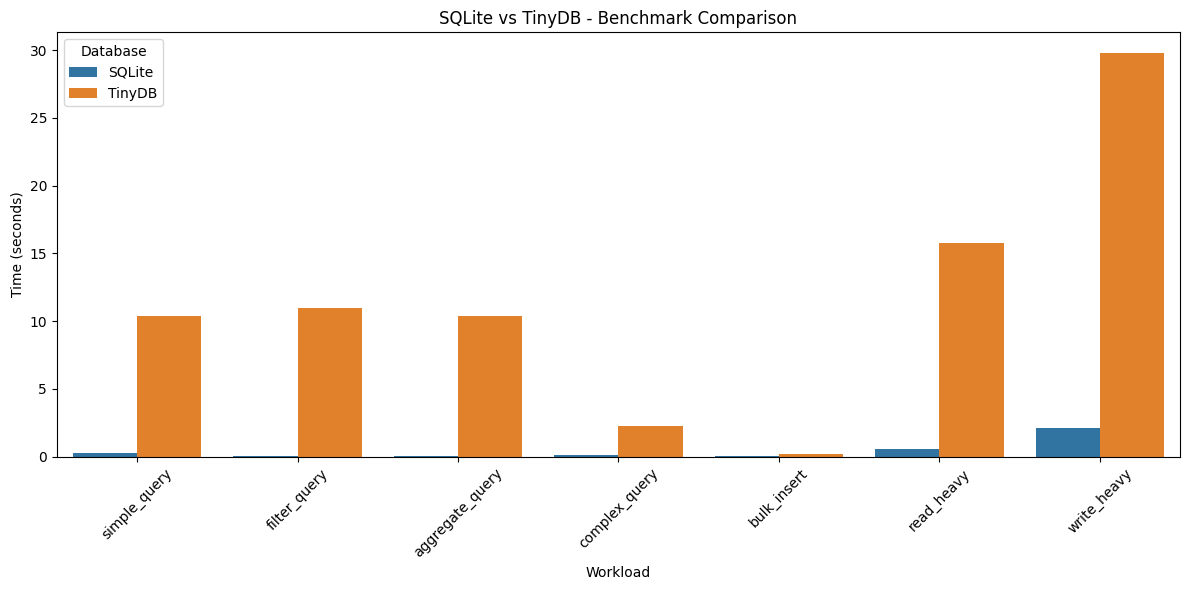


Results Summary:
          Workload  SQLite Time (s)  TinyDB Time (s)  Ratio (TinyDB/SQLite)
0     Simple Query            0.259           10.414                 40.151
1     Filter Query            0.079           10.935                137.585
2  Aggregate Query            0.028           10.396                371.545
3    Complex Query            0.115            2.251                 19.628
4      Bulk Insert            0.033            0.161                  4.851
5       Read Heavy            0.595           15.795                 26.549
6      Write Heavy            2.089           29.823                 14.273


In [29]:
# Main benchmark execution code
def run_database_comparison():
    print("Starting database benchmark...")
    benchmark = DatabaseBenchmark()
    
    print("\nTransferring data from SQLite to TinyDB...")
    benchmark.load_data_from_sqlite()
    
    print("\nRunning benchmarks...")
    benchmark.run_benchmark(num_operations=500)
    
    print("\nGenerating result plots...")
    comparison_table = benchmark.plot_results()
    
    print("\nResults Summary:")
    print(comparison_table)
    
    return benchmark, comparison_table

if __name__ == "__main__":
    run_database_comparison()

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Working with Pandas DataFrame</h3>

In this section, I converted the processed Spark DataFrames to pandas format for easier analysis and visualization while maintaining data integrity from the Spark processing pipeline.

In [30]:
def convert_to_pandas(processed_dfs):
    """Convert processed Spark DataFrames to pandas DataFrames"""
    pandas_dfs = {}
    for ticker, df in processed_dfs.items():
        pandas_dfs[ticker] = df.toPandas()
    return pandas_dfs

In [31]:
stock_pandas_df = convert_to_pandas(processed_dfs)
tweets_pandas_df = tweets_df.toPandas()

In [32]:
for ticker, df in stock_pandas_df.items():
    print(ticker, 'Pandas Dataframe')
    display(df.head())
    print('\n')

AAPL Pandas Dataframe


date ticker   Open   High    Low  Close  Adj Close     Volume  \
0  2019-12-31   AAPL 72.482 73.420 72.380 73.412     71.521  100805600   
1  2020-01-02   AAPL 74.060 75.150 73.798 75.088     73.153  135480400   
2  2020-01-03   AAPL 74.287 75.145 74.125 74.357     72.441  146322800   
3  2020-01-06   AAPL 73.448 74.990 73.188 74.950     73.019  118387200   
4  2020-01-07   AAPL 74.960 75.225 74.370 74.598     72.675  108872000   

   tweet_count  
0            0  
1            3  
2            1  
3            2  
4            0



AMZN Pandas Dataframe


date ticker   Open   High    Low  Close  Adj Close    Volume  \
0  2019-12-31   AMZN 92.100 92.663 91.612 92.392     92.392  50130000   
1  2020-01-02   AMZN 93.750 94.900 93.207 94.900     94.900  80580000   
2  2020-01-03   AMZN 93.225 94.310 93.225 93.748     93.748  75288000   
3  2020-01-06   AMZN 93.000 95.185 93.000 95.144     95.144  81236000   
4  2020-01-07   AMZN 95.225 95.695 94.602 95.343     95.343  80898000   

   tweet_count  
0            0  
1            1  
2            0  
3            0  
4            4



MSFT Pandas Dataframe


date ticker    Open    High     Low   Close  Adj Close    Volume  \
0  2019-12-31   MSFT 156.770 157.770 156.450 157.700    151.966  18369400   
1  2020-01-02   MSFT 158.780 160.730 158.330 160.620    154.779  22622100   
2  2020-01-03   MSFT 158.320 159.950 158.060 158.620    152.852  21116200   
3  2020-01-06   MSFT 157.080 159.100 156.510 159.030    153.247  20813700   
4  2020-01-07   MSFT 159.320 159.670 157.320 157.580    151.850  21634100   

   tweet_count  
0            0  
1            0  
2            0  
3            0  
4            1



TSLA Pandas Dataframe


date ticker   Open   High    Low  Close  Adj Close     Volume  \
0  2019-12-31   TSLA 27.000 28.086 26.805 27.889     27.889  154285500   
1  2020-01-02   TSLA 28.300 28.713 28.114 28.684     28.684  142981500   
2  2020-01-03   TSLA 29.367 30.267 29.128 29.534     29.534  266677500   
3  2020-01-06   TSLA 29.365 30.104 29.333 30.103     30.103  151995000   
4  2020-01-07   TSLA 30.760 31.442 30.224 31.271     31.271  268231500   

   tweet_count  
0            0  
1            1  
2            0  
3            7  
4            5



GOOGL Pandas Dataframe


date ticker   Open   High    Low  Close  Adj Close    Volume  \
0  2019-12-31  GOOGL 66.789 67.033 66.606 66.969     66.969  19514000   
1  2020-01-02  GOOGL 67.421 68.434 67.325 68.434     68.434  27278000   
2  2020-01-03  GOOGL 67.400 68.688 67.366 68.076     68.076  23408000   
3  2020-01-06  GOOGL 67.581 69.916 67.550 69.891     69.891  46768000   
4  2020-01-07  GOOGL 70.023 70.175 69.578 69.756     69.756  34330000   

   tweet_count  
0            0  
1            0  
2            0  
3            0  
4            0



FB Pandas Dataframe


date ticker    Open    High     Low   Close  Adj Close    Volume  \
0  2019-12-31     FB 204.000 205.560 203.600 205.250    205.250   8953500   
1  2020-01-02     FB 206.750 209.790 206.270 209.780    209.780  12077100   
2  2020-01-03     FB 207.210 210.400 206.950 208.670    208.670  11188400   
3  2020-01-06     FB 206.700 212.780 206.520 212.600    212.600  17058900   
4  2020-01-07     FB 212.820 214.580 211.750 213.060    213.060  14912400   

   tweet_count  
0            0  
1            0  
2            0  
3            0  
4            2

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Exploratory Data Analysis</h3>

In [33]:
# Set plot background to be a darkgrid
sns.set_style("darkgrid")

#### **Closing Prices of Stocks**

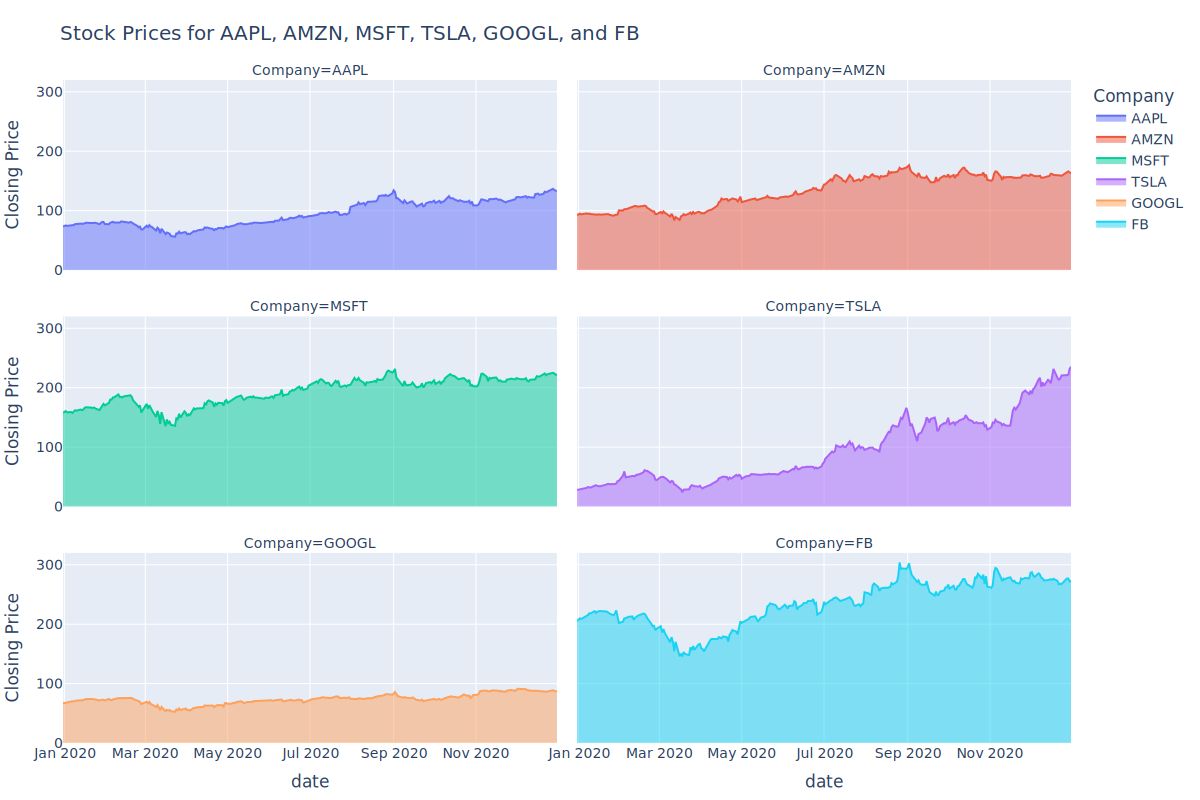

In [34]:
# Combine stock data into a single DataFrame
df_list = []
for ticker, data in stock_pandas_df.items():
    data["Ticker"] = ticker  # Add ticker column
    df_list.append(data)

df = pd.concat(df_list)  # Merge all stock DataFrames

# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot area chart with facet column
fig = px.area(df, x='date', y='Close', color='Ticker',
              facet_col='Ticker', facet_col_wrap=2,  # Arrange in a 2x2 grid
              labels={'Date': 'Date', 'Close': 'Closing Price', 'Ticker': 'Company'},
              title='Stock Prices for AAPL, AMZN, MSFT, TSLA, GOOGL, and FB')

fig.update_layout(
    width=1200,
    height=800,
    title_font_size=20,
    font_size=14,
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True
)

fig.show('svg')

**Stock Performance (Jan-Nov 2020):**  
- **COVID Impact**: All stocks dipped sharply in March 2020 (potentially Covid crash) but recovered strongly  
- **Top Performers**:  
  - TSLA: Most dramatic growth (~ **\$50** to ~ **\$235**) with high volatility  
  - AMZN: Maintained highest absolute price levels  
- **Steady Growth**: AAPL and MSFT showed consistent upward trajectories  
- **Moderate Movers**:  
  - FB: Notable fluctuations but less volatile than TSLA  
  - GOOGL: Very stable with minimal price swings  
- **Sector Resilience**: Tech stocks rebounded post-crash, peaking late 2020  

#### **Tweet WordCloud**

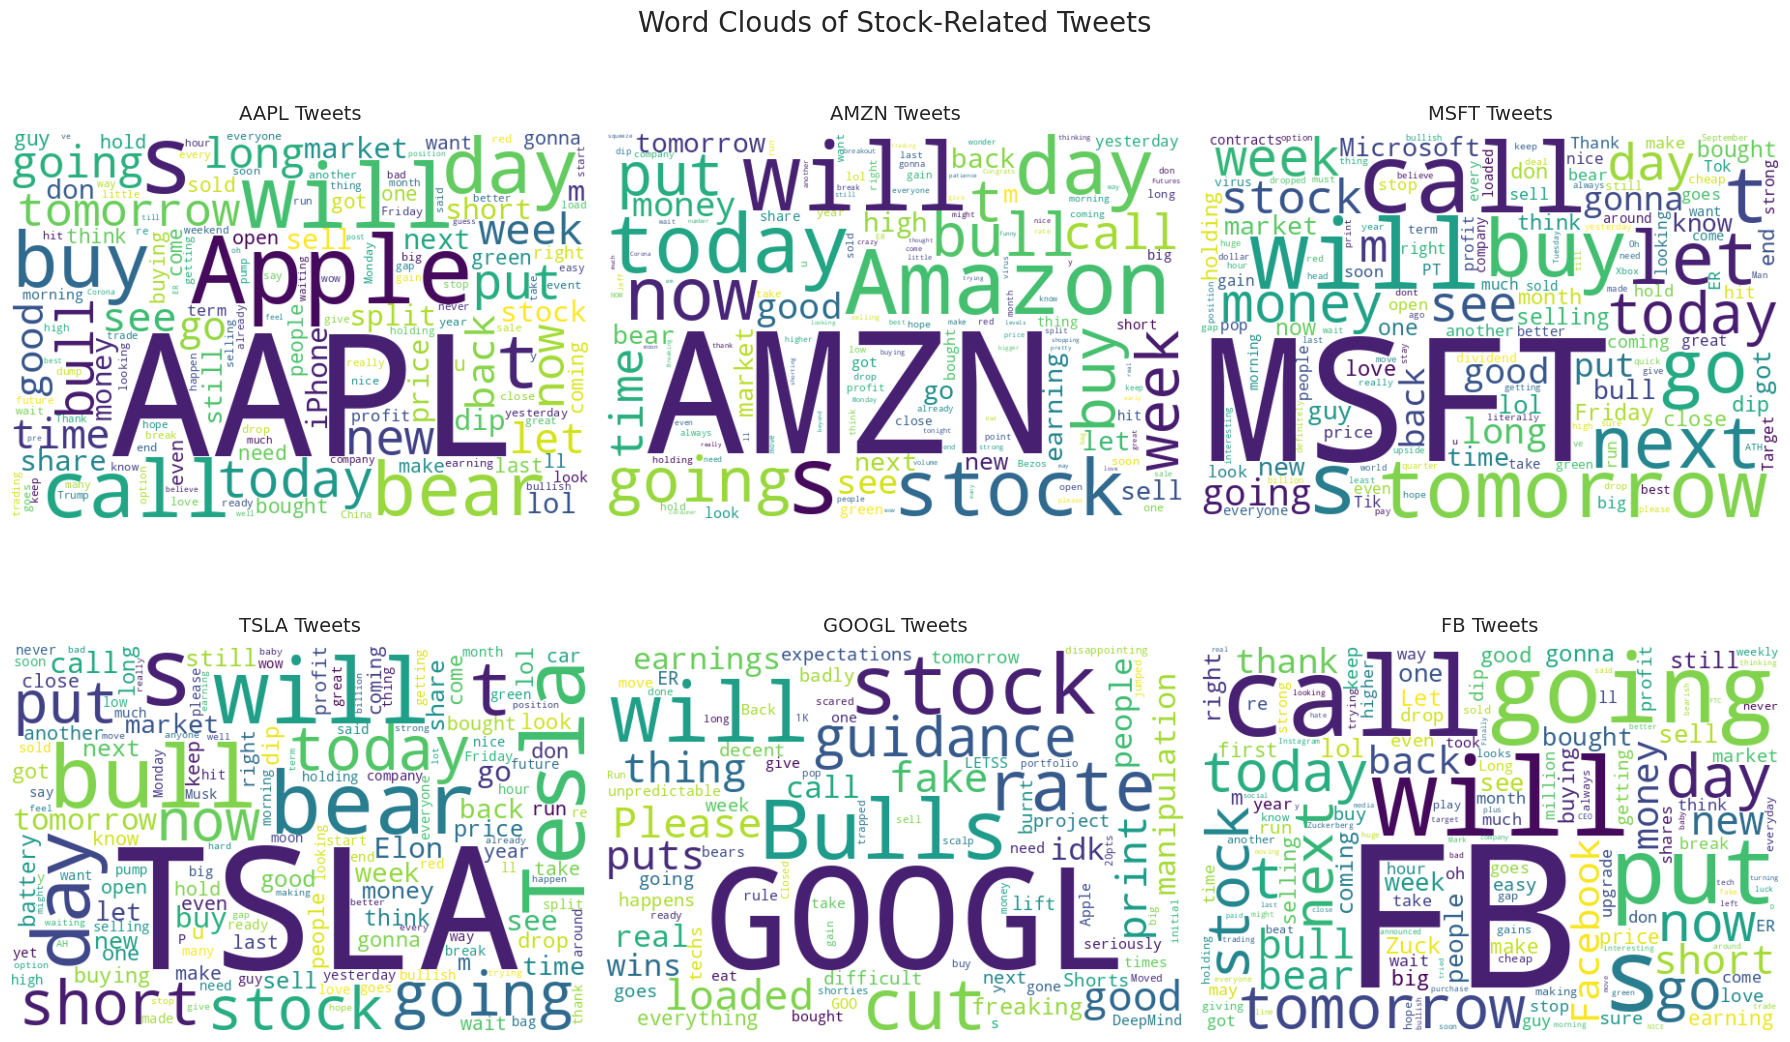

In [35]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'TSLA', 'GOOGL', 'FB']

# Create a 2x3 grid (perfect for 6 tickers)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Word Clouds of Stock-Related Tweets', fontsize=20, y=0.96)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    # Filter tweets for the current ticker and combine text
    text = ' '.join(tweets_pandas_df[tweets_pandas_df['ticker'] == ticker]['tweet'])
    
    # Generate word cloud with improved settings
    wordcloud = WordCloud(width=600, 
                         height=400,
                         background_color='white',
                         collocations=False,  # Don't show word pairs
                         random_state=42,
                         max_words=150).generate(text)
    
    # Plot in the appropriate subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'{ticker} Tweets', fontsize=14, pad=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The word clouds reveal common themes and sentiments associated with each stock ticker. For all companies, words like "buy," "sell," "call," "put," "today," "stock," and "going" dominate, reflecting active trading discussions and market sentiment. Company-specific terms also appear prominently, such as "Apple" and "iPhone" for AAPL, "Amazon" for AMZN, and "Elon" or "Musk" for TSLA, indicating strong brand associations in user discussions. The presence of words like "bull," "bear," "dip," "tomorrow," and "earnings" highlights common retail investor lingo and short-term trading focus. These insights suggest that social media sentiment around these tickers often revolves around speculation, earnings expectations, and general market movements.

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Sentiment Analysis</h3>

#### **Data Preprocessing for Sentiment Analysis**

In this section, I performed the standard data preprocessing for sentiment analysis such as:

- Converting texts to lowercase
- Tokenization
- Removing links and usernames
- Removing punctuations, stopwords, and non alphabetic letters
- Performing lemmatization

In [36]:
# Get stopwords
stop_words = stopwords.words('english')

# Initialize lemmatizer 
lemmatizer = WordNetLemmatizer()

In [37]:
def preprocess_tweet(tweet):
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove @username
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform stemming
    lemmatizer = WordNetLemmatizer()
    processed_tokens  = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(processed_tokens )

In [38]:
tweets_pandas_df['preprocessed_tweets'] = tweets_pandas_df['tweet'].apply(preprocess_tweet)

In [39]:
# View first five rows of tweets df with added preprocessed tweets
tweets_pandas_df.head()

id        date ticker  \
0  100001  2020-01-01   AMZN   
1  100002  2020-01-01   TSLA   
2  100003  2020-01-01   AAPL   
3  100004  2020-01-01   TSLA   
4  100005  2020-01-01   TSLA   

                                               tweet  \
0       $AMZN Dow futures up by 100 points already 🥳   
1  $TSLA Daddy's drinkin' eArly tonight! Here's t...   
2  $AAPL We’ll been riding since last December fr...   
3            $TSLA happy new year, 2020, everyone🍷🎉🙏   
4  "$TSLA haha just a collection of greats...""Ma...   

                                 preprocessed_tweets  
0                      amzn dow future point already  
1         tsla daddy drinkin early tonight pt ohhhhh  
2  aapl riding since last december decision decis...  
3                                tsla happy new year  
4           tsla haha collection great mar rofl bork

#### **Sentiment Analysis using VADER**

There are four sentiment type values returned when we use vader (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer:

- neg for negative sentiment
- neu for neutral sentiment
- pos for positive sentiment
- compound for an overall score that combines negative, positive, and neutral sentiments into a single score.

In our case, the compound score is the most useful metric since we want a single unidimensional measure of sentiment for a given sentence. The threshold value I used is

- positive sentiment: compound score > 0
- negative sentiment: compound score < 0
- neutral sentiment: compound score = 0

In [40]:
analyzer = SentimentIntensityAnalyzer()

In [41]:
def analyze_sentiment(lyrics):
    scores = analyzer.polarity_scores(lyrics)
    compound_score = scores['compound']
    if compound_score > 0:
        sentiment = 'positive'
    elif compound_score < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return compound_score, sentiment

In [42]:
tweets_pandas_df[['vader_compound_score', 'vader_sentiment']] = tweets_pandas_df['preprocessed_tweets'].apply(lambda x: pd.Series(analyze_sentiment(x)))

In [43]:
tweets_pandas_df.head()

id        date ticker  \
0  100001  2020-01-01   AMZN   
1  100002  2020-01-01   TSLA   
2  100003  2020-01-01   AAPL   
3  100004  2020-01-01   TSLA   
4  100005  2020-01-01   TSLA   

                                               tweet  \
0       $AMZN Dow futures up by 100 points already 🥳   
1  $TSLA Daddy's drinkin' eArly tonight! Here's t...   
2  $AAPL We’ll been riding since last December fr...   
3            $TSLA happy new year, 2020, everyone🍷🎉🙏   
4  "$TSLA haha just a collection of greats...""Ma...   

                                 preprocessed_tweets  vader_compound_score  \
0                      amzn dow future point already                 0.000   
1         tsla daddy drinkin early tonight pt ohhhhh                 0.000   
2  aapl riding since last december decision decis...                 0.000   
3                                tsla happy new year                 0.572   
4           tsla haha collection great mar rofl bork                 0.896   

  vader_sentiment  
0         neutral  
1         neutral  
2         neutral  
3        positive  
4        positive

#### **Visualizing Sentiment Distribution**

In [44]:
sentiment_colors = {'positive': '#008080',  # Teal
                    'neutral': '#FFA500',   # Orange
                    'negative': '#FF6F61'}  # Coral

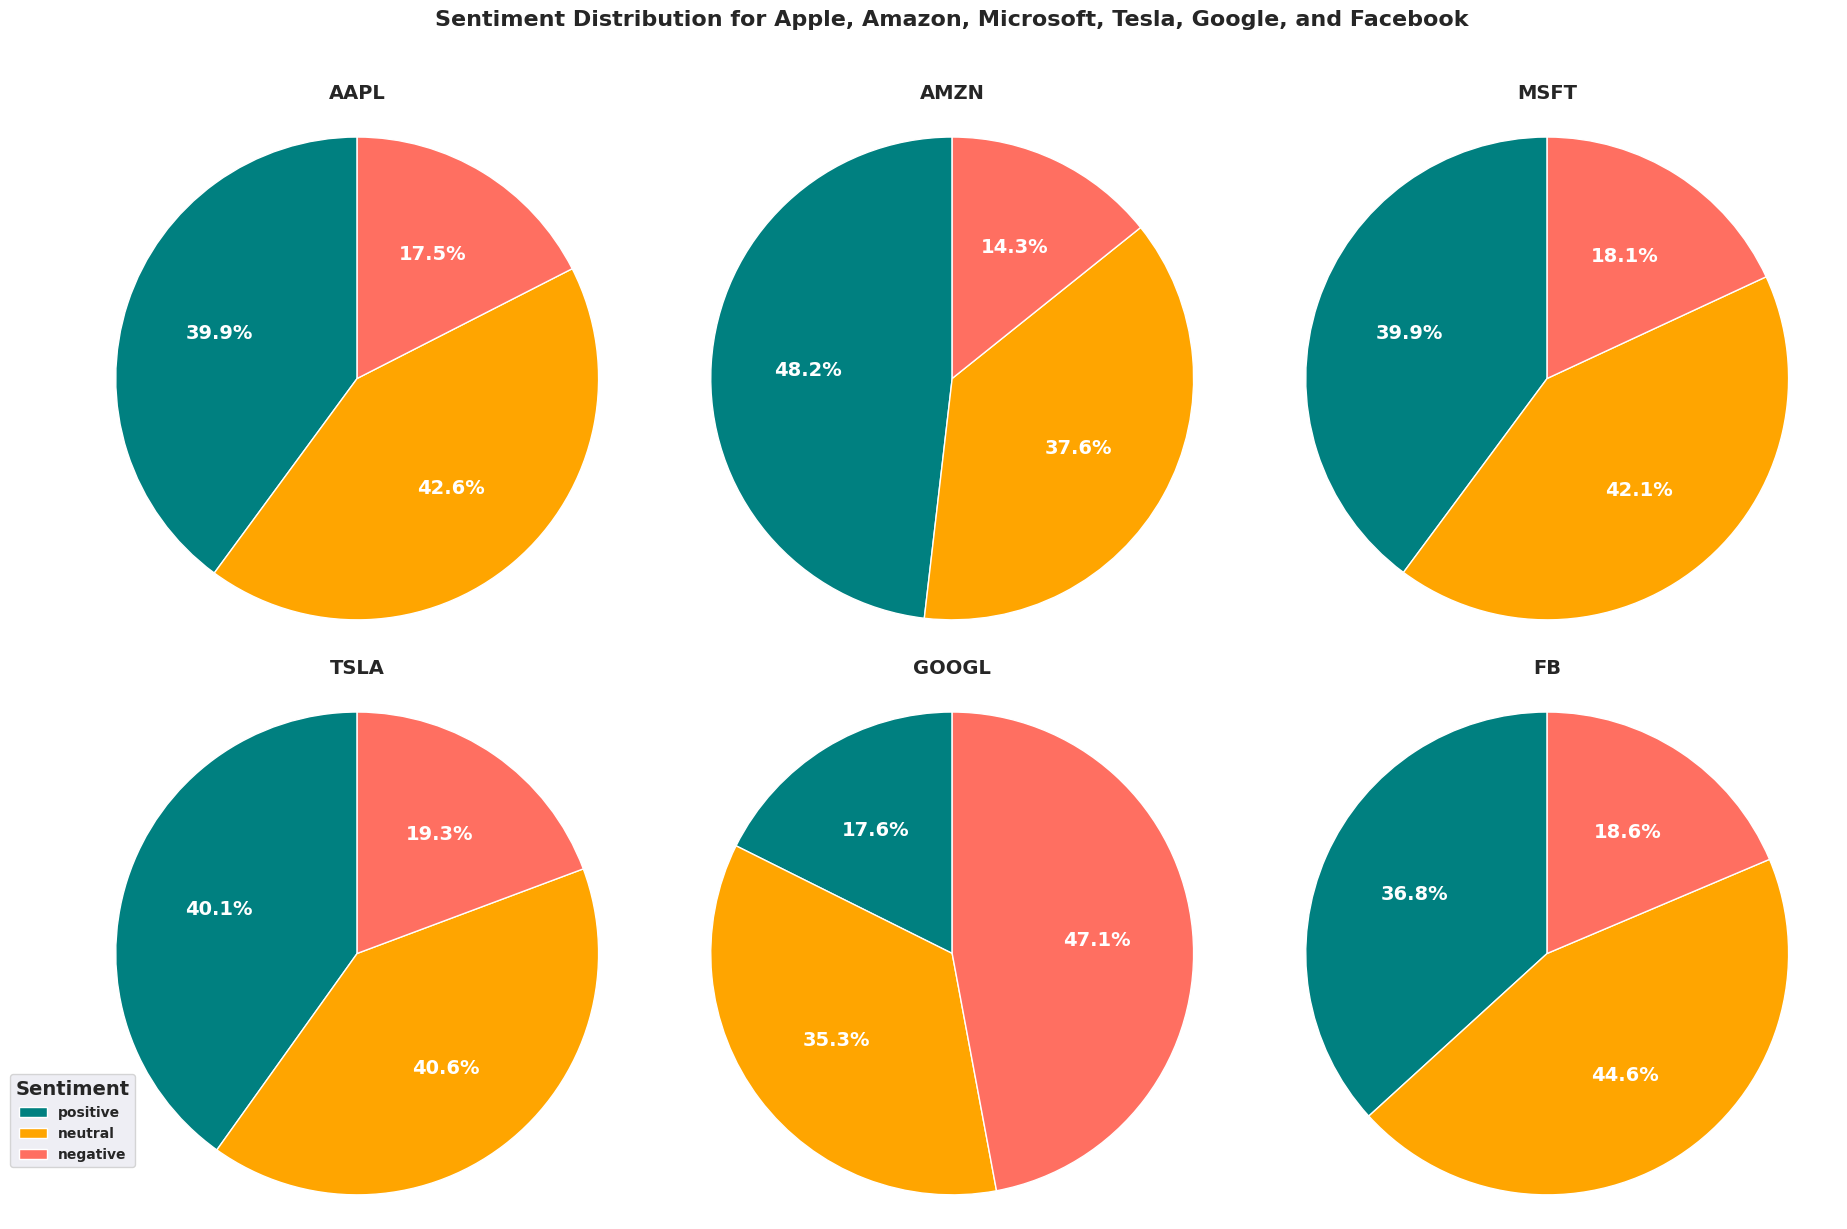

In [45]:
# Create 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sentiment Distribution for Apple, Amazon, Microsoft, Tesla, Google, and Facebook', fontsize=16, y=1.02, weight='bold')
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = tweets_pandas_df[tweets_pandas_df['ticker'] == ticker]
    
    # Get sentiment counts
    sentiment_counts = ticker_data['vader_sentiment'].value_counts()
    
    # Reorder to ensure consistent color mapping
    sentiment_counts = sentiment_counts.reindex(['positive', 'neutral', 'negative'], fill_value=0)
    
    # Plot pie chart with white bold text
    patches, texts, autotexts = axes[i].pie(
        sentiment_counts,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # Only show % if >0
        startangle=90,
        colors=[sentiment_colors[s] for s in sentiment_counts.index],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14}
    )
    
    # Make percentages white and bold
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
    
    # Add ticker as title with bold font
    axes[i].set_title(f'{ticker}', fontsize=14, pad=10, weight='bold')
    
    # Equal aspect ratio
    axes[i].axis('equal')

# Add legend with bold text
legend = fig.legend(patches, sentiment_counts.index, 
                   loc='lower right', 
                   bbox_to_anchor=(0.05, 0.05),
                   title='Sentiment',
                   title_fontproperties={'weight': 'bold', 'size': 14},
                   prop={'weight': 'bold', 'size': 10})

plt.tight_layout()
plt.show()

Some key insights we can get from the visualization are:

1. Amazon (AMZN) has the most positive sentiment at 48.2%, significantly higher than other tech companies.

2. Google (GOOGL) stands out with unusually high negative sentiment (47.1%) - almost half of all sentiment is negative, which is notably different from other tech stocks.

3. Most companies show a similar pattern with neutral sentiment being the largest category (around 40-44%), except for Google and Amazon which show more polarized sentiment.

4. Apple (AAPL) and Microsoft (MSFT) show very similar sentiment distributions, with almost identical positive sentiment percentages (39.9%) and similar neutral-to-negative ratios.

5. Facebook (FB) has the lowest positive sentiment (36.8%) among the companies after Google, potentially indicating less investor confidence compared to AAPL, MSFT, and AMZN.

6. Tesla (TSLA) shows a relatively balanced distribution but has the second-highest negative sentiment (19.3%) after Google.

#### **Visualizing Positive and Negative Distribution**

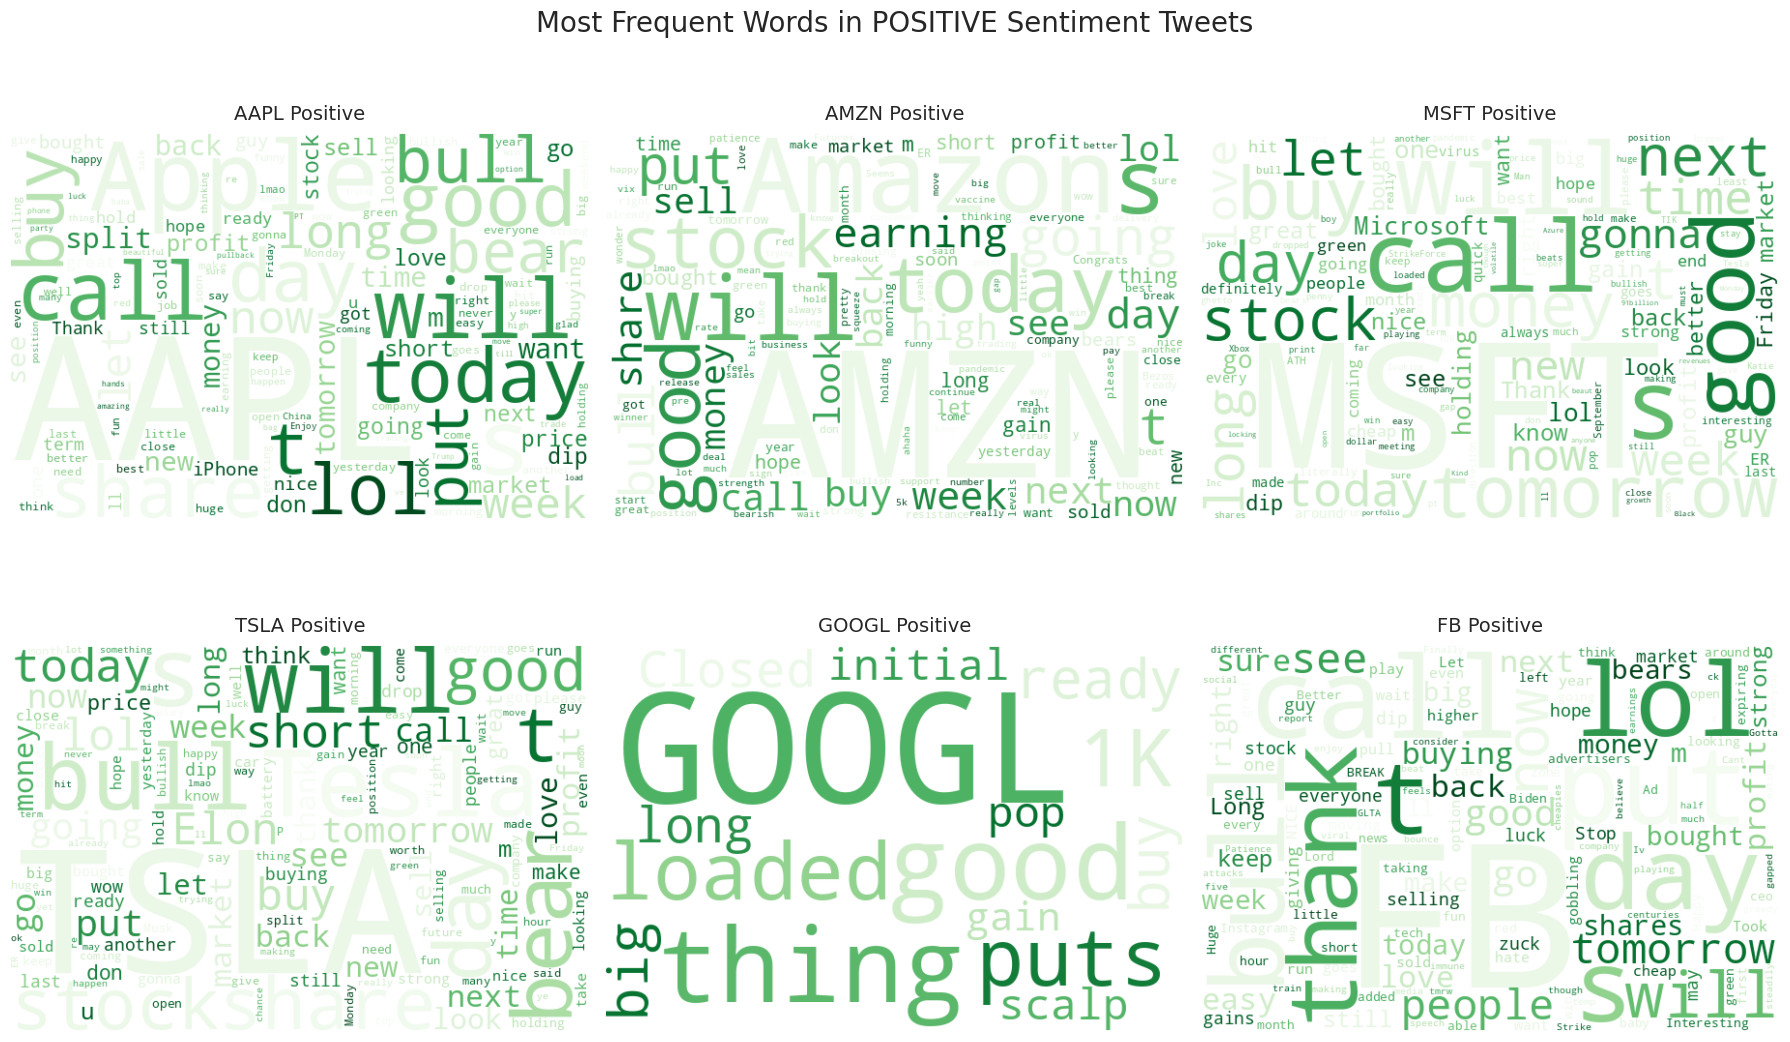

In [46]:
fig_pos, axes_pos = plt.subplots(2, 3, figsize=(18, 12))
fig_pos.suptitle('Most Frequent Words in POSITIVE Sentiment Tweets', fontsize=20, y=0.96)
axes_pos = axes_pos.flatten()

for i, ticker in enumerate(tickers):
    # Filter positive tweets for current ticker
    pos_text = ' '.join(tweets_pandas_df[(tweets_pandas_df['ticker'] == ticker) & 
                                       (tweets_pandas_df['vader_sentiment'] == 'positive')]['tweet'])
    
    wordcloud = WordCloud(width=600, 
                         height=400,
                         background_color='white',
                         colormap='Greens',  # Green scale for positive
                         collocations=False,
                         random_state=42,
                         max_words=150).generate(pos_text)
    
    axes_pos[i].imshow(wordcloud, interpolation='bilinear')
    axes_pos[i].set_title(f'{ticker} Positive', fontsize=14, pad=10)
    axes_pos[i].axis('off')

plt.tight_layout()
plt.show()

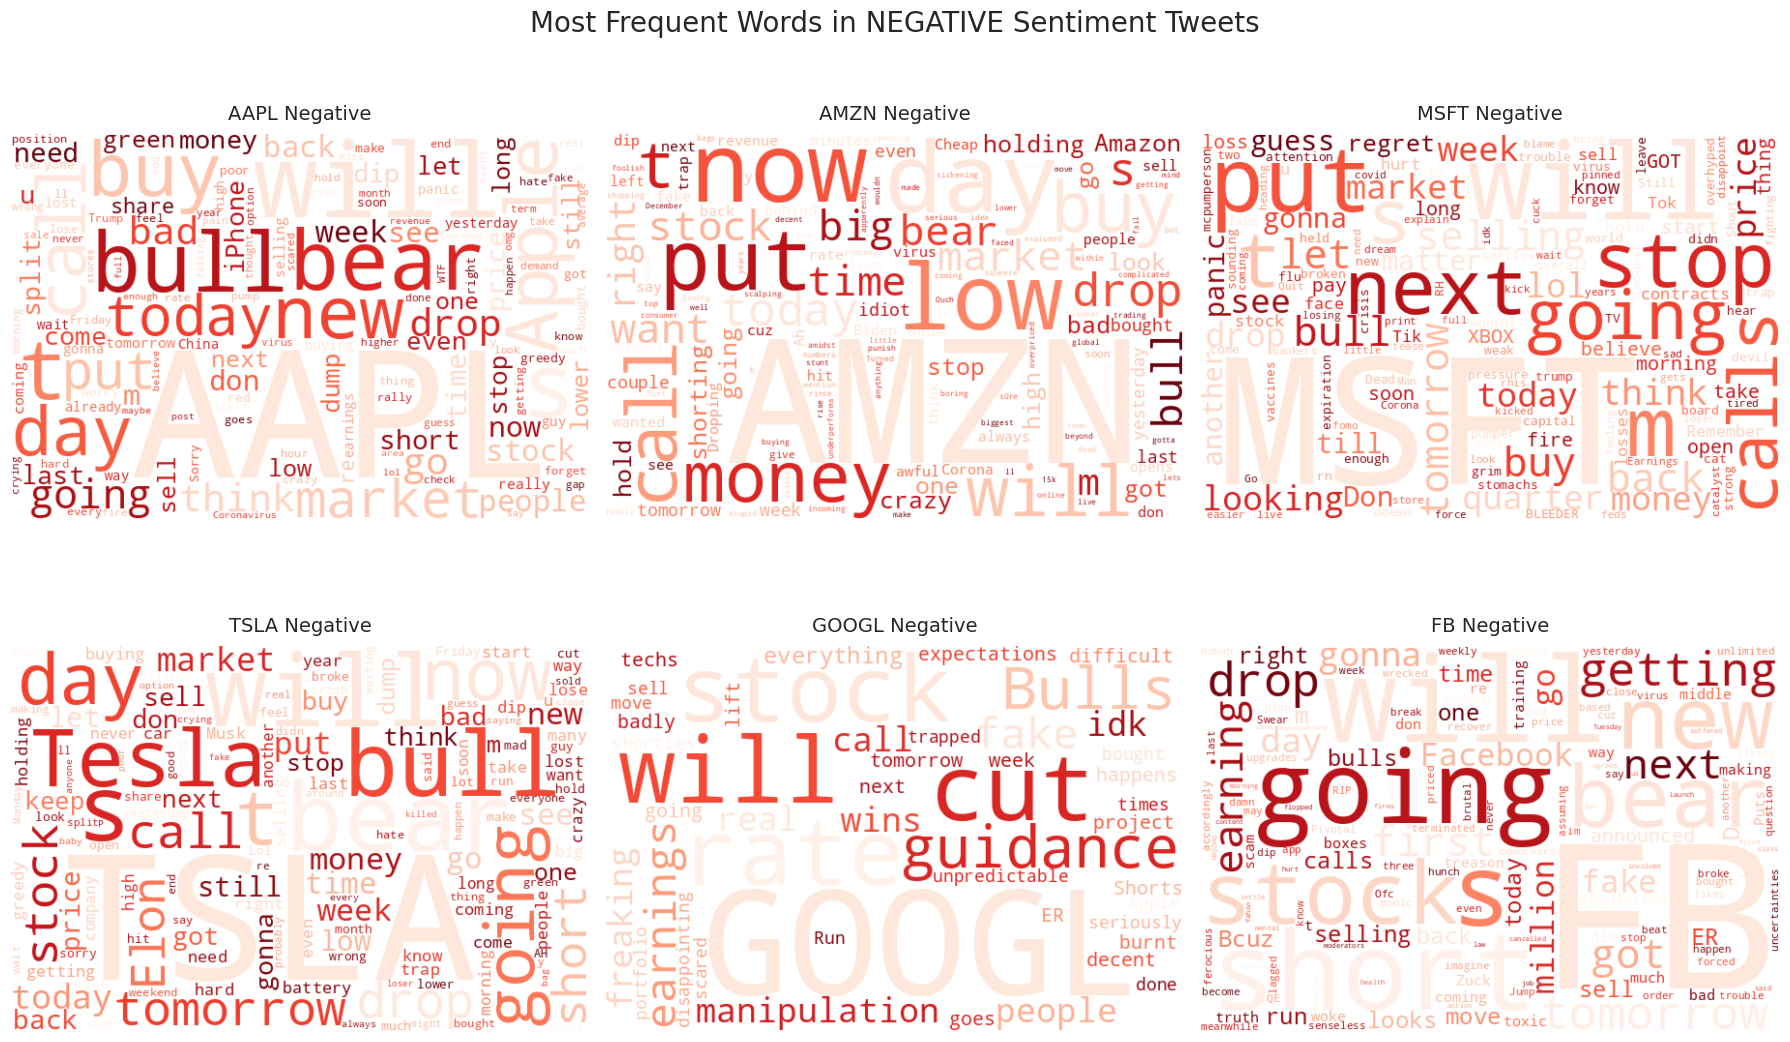

In [47]:
fig_neg, axes_neg = plt.subplots(2, 3, figsize=(18, 12))
fig_neg.suptitle('Most Frequent Words in NEGATIVE Sentiment Tweets', fontsize=20, y=0.96)
axes_neg = axes_neg.flatten()

for i, ticker in enumerate(tickers):
    # Filter negative tweets for current ticker
    neg_text = ' '.join(tweets_pandas_df[(tweets_pandas_df['ticker'] == ticker) & 
                                       (tweets_pandas_df['vader_sentiment'] == 'negative')]['tweet'])
    
    wordcloud = WordCloud(width=600, 
                         height=400,
                         background_color='white',
                         colormap='Reds',  # Red scale for negative
                         collocations=False,
                         random_state=42,
                         max_words=150).generate(neg_text)
    
    axes_neg[i].imshow(wordcloud, interpolation='bilinear')
    axes_neg[i].set_title(f'{ticker} Negative', fontsize=14, pad=10)
    axes_neg[i].axis('off')

plt.tight_layout()
plt.show()

#### **Inference from Postive and Negative Wordcloud Visualization**

- Apple (AAPL) shows optimistic trading language in positive sentiment ("buy," "call," "today"), while negative sentiment reveals pandemic concerns ("Coronavirus," "Corona"), market manipulation fears ("hate," "fake," "WTF"), and anxiety about corporate actions ("split").

- Amazon (AMZN) positive sentiment focuses on earnings and performance, while negative sentiment reveals strong pandemic influence ("virus," "corona"), bearish trading positions ("shorting," "drop," "dip"), and emotional reactions ("crazy," "awful"). This suggests COVID-19 significantly impacted negative perceptions of Amazon.

- Microsoft (MSFT) displays positive language around future potential, contrasted with negative sentiment expressing remorse ("regret"), pandemic concerns ("covid"), financial loss ("loss," "hurt"), and pessimistic timing references ("morning," "tomorrow"). 

- Tesla (TSLA) contain negative sentiment, with words directly related to investor pain ("crying," "mad," "crazy"), CEO-focused criticism ("Elon"), and trapped investment positions ("stop," "trap," "sold," "lose"). This reveals how Tesla perhaps creates the most personal and emotional investor reactions among these stocks.

- Google (GOOGL) negative sentiment uniquely highlights feelings of investor manipulation ("trapped," "manipulation," "shorts," "burnt"), earnings report concerns ("ER"), and unpredictable performance ("difficult," "badly"). This matches its high negative sentiment percentage from the pie charts and suggests investors feel particularly misled or disappointed.

- Facebook (FB) negative sentiment reveals concerns about user metrics ("million"), authenticity issues ("fake," "senseless," "toxic"), pandemic impact ("virus"), and forced selling ("selling," "drop," "forced").

Across all companies, pandemic-related terms appear frequently in negative sentiment, showing how COVID-19 broadly affected tech stock sentiment, while each company also faces unique criticism related to its specific business challenges and market position.

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Data Preparation for Modeling</h3>

In this section, I prepare the time series data for both ARIMA and LSTM modeling by implementing functions that handle data preprocessing. I created utilities to split the dataset into training and testing sets using an 80/20 ratio, and applied scaling to normalize the data using MinMaxScaler, which is particularly important for the LSTM model's performance.

I aslo implemented the `create_sequences()` function that transforms the continuous time series data into supervised learning format with lookback periods, which allows the LSTM model to learn from past trends. The `train_test_split_and_scale()` function combines these preprocessing steps into a single workflow, returning properly formatted training and testing datasets, along with the scaler object and corresponding dates for later evaluation and visualization.

In [48]:
def create_sequences(data, lookback):
    """
    Creates sequences of data for LSTM input.

    Args:
        data (np.array): The scaled data.
        lookback (int): The number of timesteps to use for the lookback period.

    Returns:
        X (np.array): Input sequences.
        y (np.array): Target values.
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [49]:
def train_test_split_and_scale(df, lookback):
    """
    Splits the data into training and testing sets, scales the data, and creates sequences for LSTM.

    Args:
        df (pd.DataFrame): The input DataFrame containing stock data.
        lookback (int): The number of timesteps to use for the lookback period.

    Returns:
        X_train (np.array): Training input sequences.
        y_train (np.array): Training target values.
        X_test (np.array): Testing input sequences.
        y_test (np.array): Testing target values.
        scaler (MinMaxScaler): The scaler object used for scaling the data.
        train_dates (np.array): Dates corresponding to training data points.
        test_dates (np.array): Dates corresponding to testing data points.
    """
    # Extract the "Close" column
    data = df[['Close']].values
    dates = df['date'].values
    
    # Split into training and testing sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    train_dates, test_dates = dates[:train_size], dates[train_size:]
    
    # Scale the data
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    
    # Create sequences for LSTM
    X_train, y_train = create_sequences(train_scaled, lookback)
    X_test, y_test = create_sequences(test_scaled, lookback)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))    
    
    return X_train, y_train, X_test, y_test, scaler, train_dates[lookback:], test_dates[lookback:]

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Model Building</h3>

In this section, I develop and implement two different forecasting models - ARIMA and LSTM - to predict stock prices based on historical data. First, I create the ARIMA model using the `build_arima_model()` function, which leverages the `auto_arima` capability to automatically find optimal parameters (p,d,q) for the time series. This implementation includes tweet count as an exogenous variable to potentially capture the impact of social media sentiment on stock prices.

For the deep learning approach, I implement an LSTM (Long Short-Term Memory) neural network through the `build_lstm()` function. The model architecture consists of two LSTM layers with dropout regularization to prevent overfitting, followed by a dense output layer. The network is designed to capture temporal dependencies in the time series data using the lookback sequences created in the data preparation phase.

To ensure systematic evaluation and comparison between models, I create a comprehensive `evaluate_models()` function that handles the entire workflow - from data preparation to model training, prediction, and performance evaluation. This function calculates key metrics like RMSE and MAE for both models and generates visualizations to compare actual versus predicted values across the test period.

Finally, I implement the `train_all_models()` function that orchestrates the training process across multiple stocks in the dataset. The function processes each stock ticker, trains both ARIMA and LSTM models with the specified parameters, collects performance metrics, and returns everything in an organized structure for further analysis. I set a lookback period of 5 time steps, which is appropriate for the relatively short time series data being analyzed.

#### **Define Arima Model**

In [50]:
def build_arima_model(df):
    """
    Builds and fits an ARIMA model using auto_arima to find optimal parameters. 
    Uses tweet count as an exogenous feature 
    
    Args:
        df (pd.DataFrame): DataFrame containing the stock data with a 'Close' column.
        
    Returns:
        model: Fitted ARIMA model
        predictions: In-sample predictions
        order: The order of the ARIMA model (p,d,q)
    """
    # Extract the close prices
    close_prices = df['Close'].values
    
    # Use auto_arima to find the best parameters
    print("Finding optimal ARIMA parameters...")
    model = auto_arima(
        close_prices,
        exogenous_features=df['tweet_count'],
        start_p=0, start_q=0,
        max_p=5, max_q=5, max_d=2,
        seasonal=False,
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )
    
    # Get the order (p,d,q)
    order = model.order
    print(f"Best ARIMA order: {order}")
    
    # Get in-sample predictions
    predictions = model.predict_in_sample()
    
    return model, predictions, order

#### **Define LSTM Model**

In [51]:
def build_lstm(X_train, y_train, epochs=20, batch_size=16, show_summary=False):
    """
    Builds, compiles, and trains an LSTM model for time series forecasting.
    Simplified for short time series data.

    Args:
        X_train (np.array): Training input sequences with shape (n_samples, lookback, 1).
        y_train (np.array): Training target values with shape (n_samples,).
        epochs (int): Number of epochs to train the model. Default is 20.
        batch_size (int): Batch size for training. Default is 16.
        show_summary (bool): If True, prints the model summary. Default is False.

    Returns:
        model (tf.keras.Model): The trained LSTM model.
        history (tf.keras.callbacks.History): Training history containing loss and validation loss.
    """
    # Simpler model for short time series
    model = Sequential([
        LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    if show_summary:
        print('LSTM Model', end='\n\n')
        model.summary()

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_split=0.2, 
        callbacks=[early_stopping], 
        verbose=1
    )
    return model, history

#### **Define Helper Function for Handling Model Training and Evaluation**

In [52]:
def evaluate_models(stock_name, df, lookback=30, show_summary=False):
    """
    Trains and evaluates both ARIMA and LSTM models for a given stock.

    Args:
        stock_name (str): Name of the stock.
        df (pd.DataFrame): DataFrame containing the stock data.
        lookback (int): Number of timesteps for LSTM. Default is 30.
        show_summary (bool): If True, prints summaries. Default is False.

    Returns:
        dict: Dictionary with evaluation metrics for both models.
    """
    print(f"\n=== Processing {stock_name} ===")
    
    # Prepare data for LSTM
    X_train, y_train, X_test, y_test, scaler, train_dates, test_dates = train_test_split_and_scale(df, lookback)

    # Train the LSTM model
    print("Training LSTM model...")
    lstm_model, lstm_history = build_lstm(X_train, y_train, show_summary=show_summary)
    
    # Make LSTM predictions and inverse transform to original scale
    y_pred_lstm = lstm_model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm).flatten()
    
    # Calculate LSTM evaluation metrics
    lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm_inv))
    lstm_mae = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
    
    # Train the ARIMA model on the entire dataset
    arima_model, arima_preds, arima_order = build_arima_model(df)
    
    # Make ARIMA predictions for test set (forecast)
    train_size = int(len(df) * 0.8)
    test_size = len(df) - train_size - lookback
    
    # Forecast for test period
    arima_forecast = arima_model.predict(n_periods=test_size)
    
    # Extract actual test values for ARIMA comparison
    y_test_arima = df['Close'].values[train_size+lookback:]
    
    # Calculate ARIMA evaluation metrics
    arima_rmse = np.sqrt(mean_squared_error(y_test_arima, arima_forecast))
    arima_mae = mean_absolute_error(y_test_arima, arima_forecast)
    
    # Plot the results
    plt.figure(figsize=(14, 7))
    
    # LSTM predictions
    plt.subplot(2, 1, 1)
    plt.plot(df['date'][train_size+lookback:].values, y_test_arima, label='Actual')
    plt.plot(df['date'][train_size+lookback:].values, y_pred_lstm_inv, label='LSTM Prediction')
    plt.title(f'{stock_name} Stock Price Prediction - LSTM')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.xticks(rotation=45)
    
    # ARIMA predictions
    plt.subplot(2, 1, 2)
    plt.plot(df['date'][train_size+lookback:].values, y_test_arima, label='Actual')
    plt.plot(df['date'][train_size+lookback:].values, arima_forecast, label='ARIMA Prediction')
    plt.title(f'{stock_name} Stock Price Prediction - ARIMA ({arima_order})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics as a dictionary
    return {
        "Stock": stock_name,
        "LSTM_RMSE": lstm_rmse,
        "LSTM_MAE": lstm_mae,
        "ARIMA_RMSE": arima_rmse,
        "ARIMA_MAE": arima_mae,
        "ARIMA_Order": arima_order
    }, (lstm_model, arima_model), (y_test_arima, y_pred_lstm_inv, arima_forecast), scaler

#### **Model Training**

In [53]:
def train_all_models(stock_pandas_df, lookback=30):
    """
    Trains and evaluates both models for all stocks in the dictionary.
    
    Args:
        stock_pandas_df (dict): Dictionary with stock tickers as keys and DataFrames as values.
        lookback (int): Lookback period for LSTM.
        
    Returns:
        results (list): List of dictionaries with evaluation metrics.
    """
    results = []
    trained_models = {}
    predictions = {}
    scalers = {}
    
    # Process each stock
    for ticker, df in stock_pandas_df.items():
        result, models, preds, scaler = evaluate_models(ticker, df, lookback=lookback, show_summary=(ticker == list(stock_pandas_df.keys())[0]))
        results.append(result)
        trained_models[ticker] = models
        predictions[ticker] = preds
        scalers[ticker] = scaler
    
    # Display results in a table
    results_df = pd.DataFrame(results)
    print("\n=== Model Performance Comparison ===")
    print(results_df)
    
    return results_df, trained_models, predictions, scalers


=== Processing AAPL ===
Training LSTM model...


I0000 00:00:1747301497.268000    7346 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747301497.268768    7346 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


LSTM Model



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 32)               │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1747301502.433565    7879 cuda_dnn.cc:529] Loaded cuDNN version 90300


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.1052 - val_loss: 0.3083
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0572 - val_loss: 0.0812
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - val_loss: 0.0147
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - val_loss: 0.0438
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - val_loss: 0.0410
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - val_loss: 0.0161
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 0.0064
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0103
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0071
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038 - val_loss: 0.012

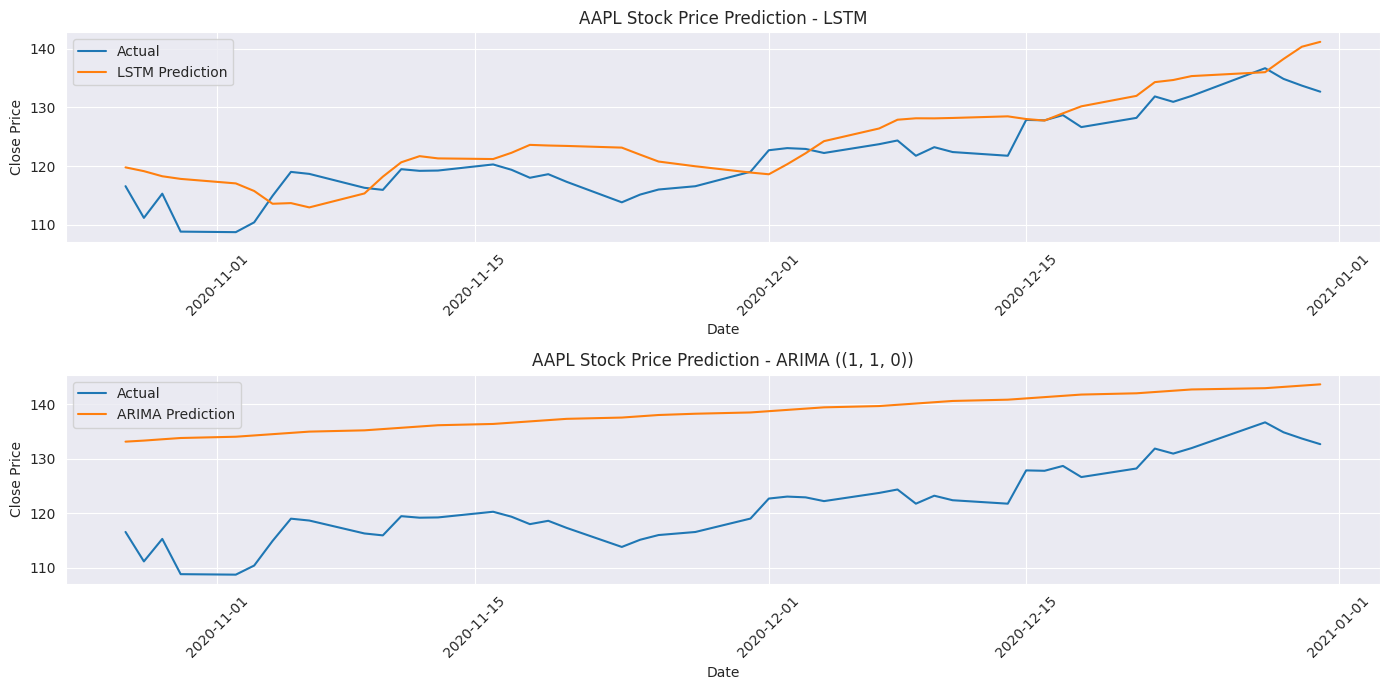


=== Processing AMZN ===
Training LSTM model...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1721 - val_loss: 0.2719
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0474 - val_loss: 0.0212
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - val_loss: 0.0041
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - val_loss: 0.0292
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - val_loss: 0.0129
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - val_loss: 0.0055
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - val_loss: 0.0068
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0053
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Finding optimal ARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1304.225, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1304.016, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] inter

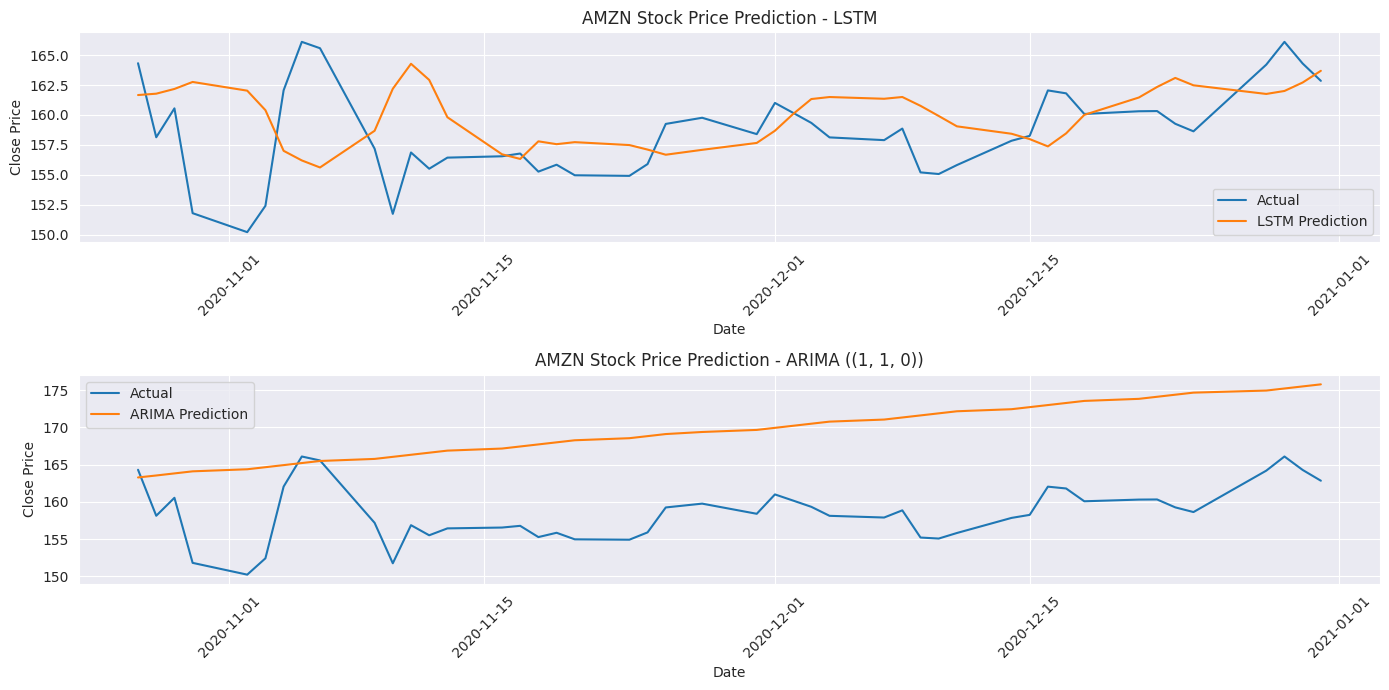


=== Processing MSFT ===
Training LSTM model...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2574 - val_loss: 0.3418
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0970 - val_loss: 0.0770
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219 - val_loss: 0.0056
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204 - val_loss: 0.0193
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - val_loss: 0.0277
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - val_loss: 0.0134
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.0092
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - val_loss: 0.0116
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Finding optimal ARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1512.674, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1484.021, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] inter

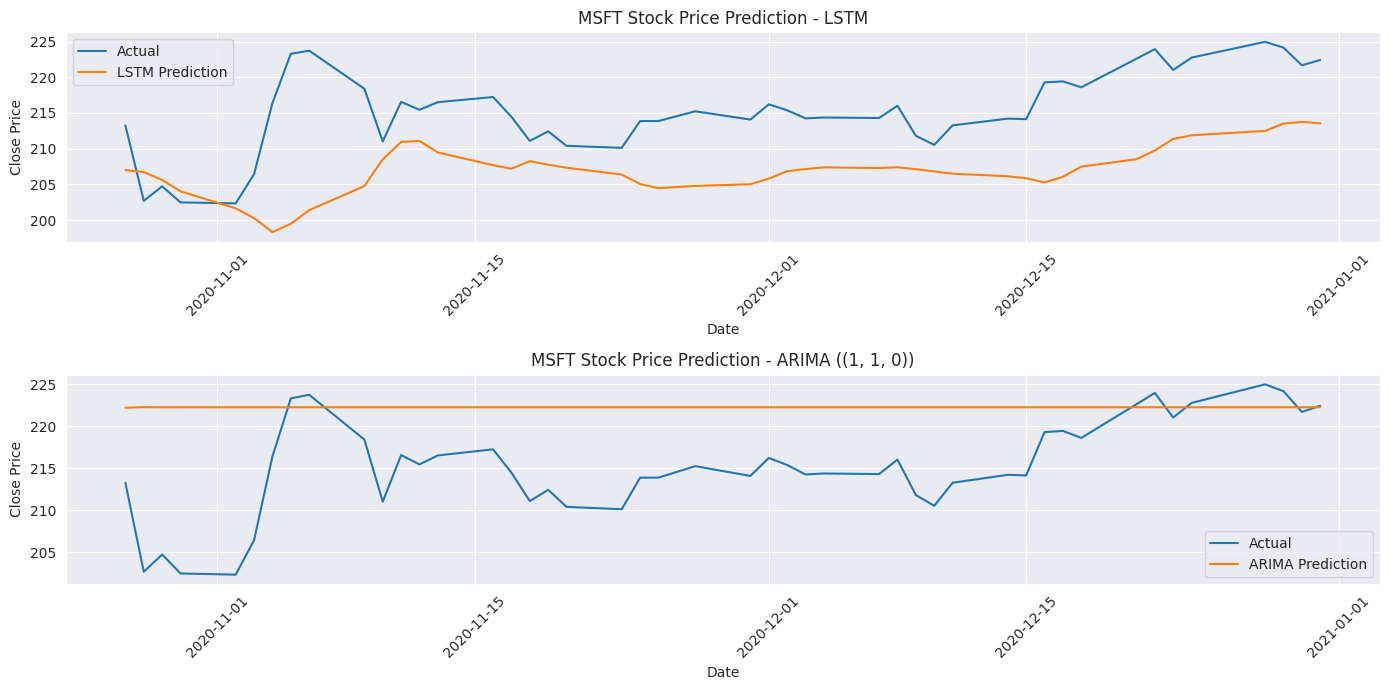


=== Processing TSLA ===
Training LSTM model...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0668 - val_loss: 0.2855
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0310 - val_loss: 0.0383
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0305
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - val_loss: 0.0439
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - val_loss: 0.0121
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 0.0102
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - val_loss: 0.0145
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 0.0332
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0272
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0305
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0160
2/2 ━━━━━━━━━━━━━━━━━━━━ 

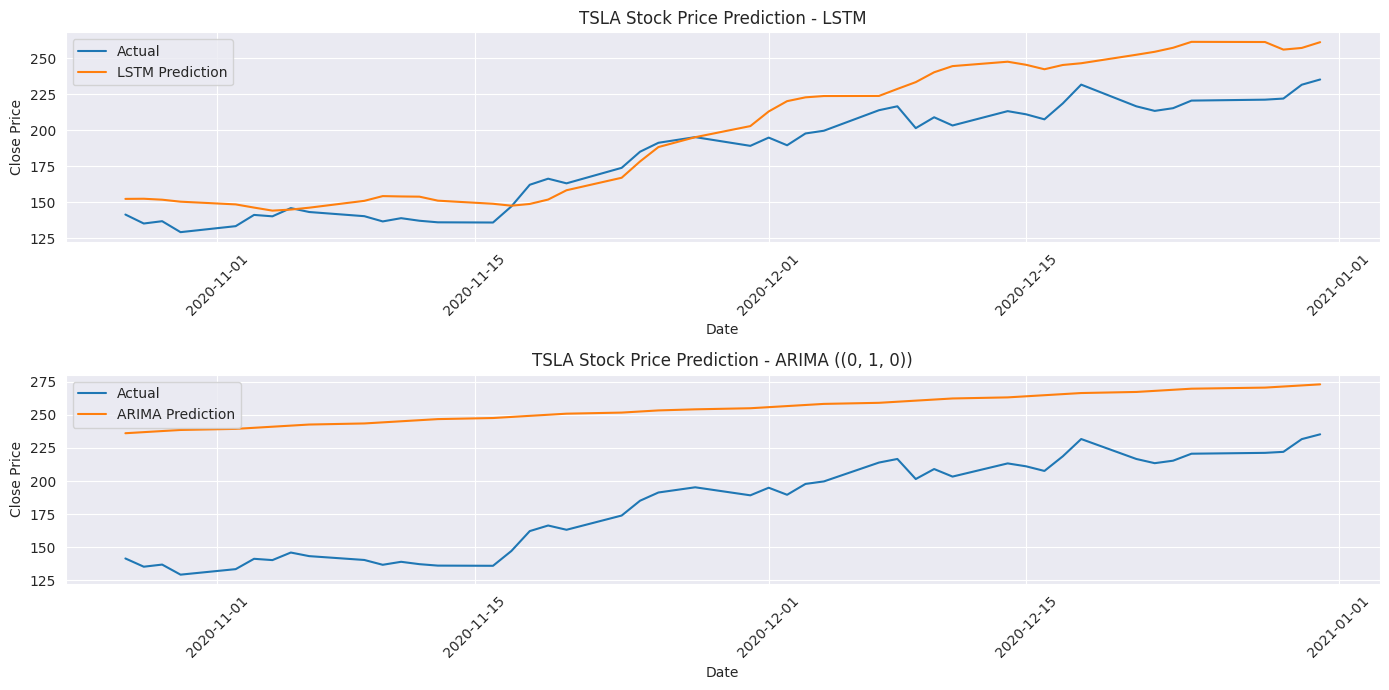


=== Processing GOOGL ===
Training LSTM model...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2436 - val_loss: 0.2405
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0920 - val_loss: 0.0335
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264 - val_loss: 0.0108
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - val_loss: 0.0186
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - val_loss: 0.0075
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - val_loss: 0.0068
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - val_loss: 0.0069
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - val_loss: 0.0058
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - val_loss: 0.0067
Epoch 12/20
10/10 ━━━━━━

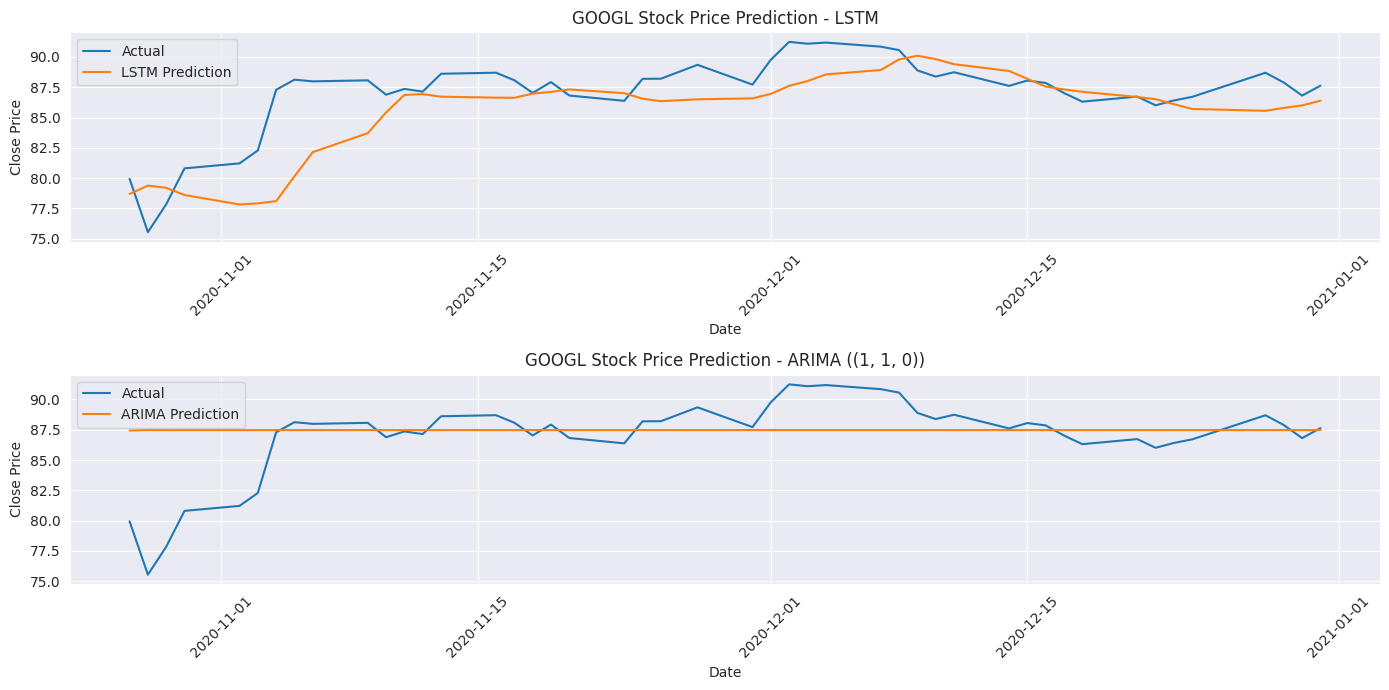


=== Processing FB ===
Training LSTM model...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.1868 - val_loss: 0.3330
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0718 - val_loss: 0.0744
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - val_loss: 0.0054
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0177 - val_loss: 0.0334
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0166 - val_loss: 0.0293
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - val_loss: 0.0126
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0088 - val_loss: 0.0119
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0116
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step
Finding optimal ARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1652.694, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1650.910, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] interc

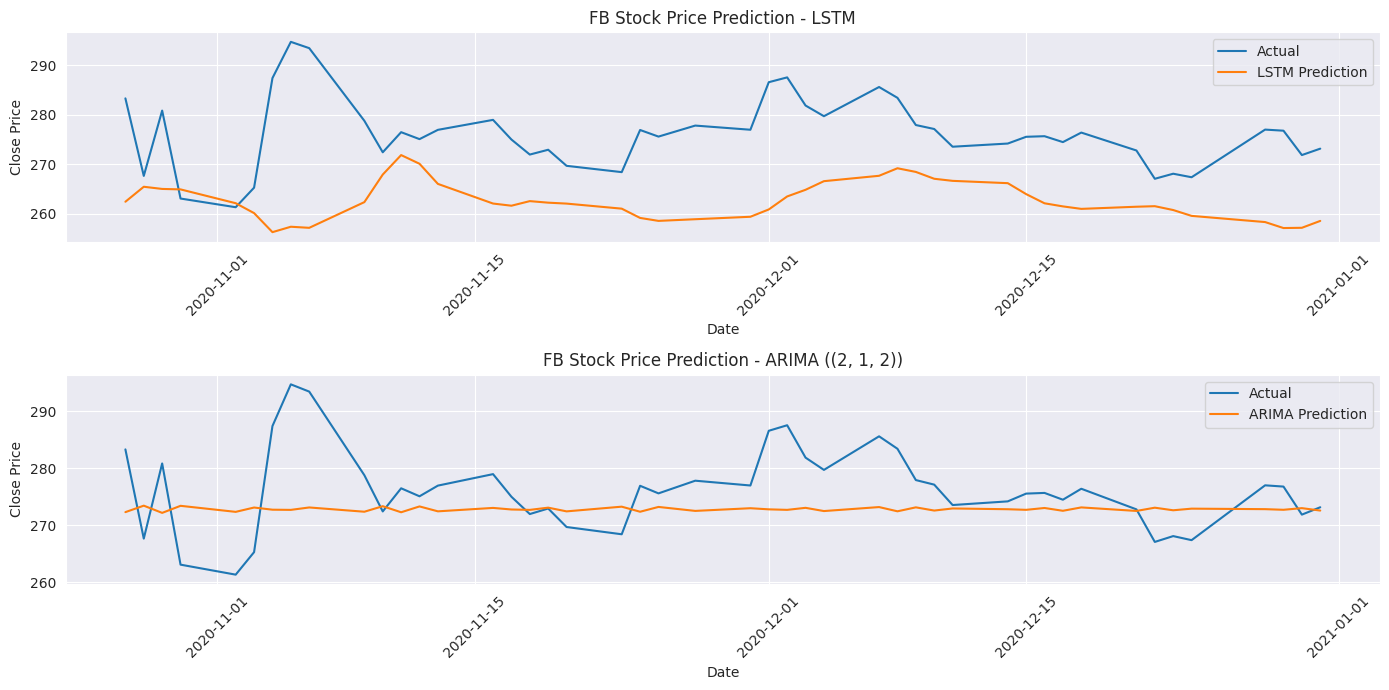


=== Model Performance Comparison ===
   Stock  LSTM_RMSE  LSTM_MAE  ARIMA_RMSE  ARIMA_MAE ARIMA_Order
0   AAPL      4.633     3.890      17.419     16.889   (1, 1, 0)
1   AMZN      4.751     3.636      11.753     11.051   (1, 1, 0)
2   MSFT      9.866     8.550       9.040      7.425   (1, 1, 0)
3   TSLA     23.183    19.506      77.358     73.352   (0, 1, 0)
4  GOOGL      2.759     1.976       3.276      2.001   (1, 1, 0)
5     FB     15.839    13.644       7.884      6.046   (2, 1, 2)


In [54]:
# Set lookback period based on short time series
lookback = 5

# Train models for all stocks
results_df, trained_models, predictions, scalers = train_all_models(stock_pandas_df, lookback=lookback)

The LSTM model demonstrates varying degrees of success across the different stocks. For AAPL, the LSTM shows some ability to capture directional movements, particularly in the November-December 2020 period, though it tends to overestimate prices toward the end of the testing period. For AMZN, the LSTM predictions generally follow the actual price trends with moderate accuracy, often capturing the overall direction but missing some of the sharper fluctuations. In the case of FB, the LSTM model consistently underestimates the actual stock prices, suggesting difficulties in capturing this stock's unique volatility patterns.

For TSLA, the LSTM model initially overestimates the stock price but captures the significant upward trend starting in mid-November, though it continues to overpredict the price throughout December. The GOOGL predictions show fairly good alignment with actual prices, particularly in the November-December period, making it one of the more successful applications of the LSTM model in this analysis. MSFT shows a consistent underprediction pattern where the LSTM fails to capture the rapid price increases, especially in November and late December.

The ARIMA model, however, shows significant limitations across all six stocks. For AAPL, AMZN, and TSLA, the ARIMA predictions display an almost linear upward trend that fails to capture the actual price fluctuations. For GOOGL, the ARIMA model produces nearly flat predictions around the mean value, completely missing the volatility present in the actual data. Similarly, for MSFT, the ARIMA model generates an almost constant prediction line that fails to respond to actual market movements. For FB, the ARIMA model (with parameters 2,1,2) produces slightly more varied predictions but still fails to capture the significant price movements.

The underwhelming performance of the ARIMA models can be attributed to several factors. First, the limited dataset of only 254 trading days from December 2019 to December 2020 doesn't provide sufficient historical patterns for the ARIMA model to learn from. Second, stock prices are influenced by numerous external factors beyond historical prices alone, such as market sentiment, company news, and broader economic conditions, which aren't captured in our simple univariate ARIMA implementation. While incorporating tweet counts as an exogenous variable was attempted, this single feature likely wasn't sufficient to significantly improve predictions.

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Model Evaluation</h3>

To evaluate and compare the performance of ARIMA and LSTM models across six major tech stocks, I implemented both quantitative metrics—Root Mean Square Error (RMSE) and Mean Absolute Error (MAE)—and visual inspection. A visualization function was developed to generate bar plots for error metrics, making it easier to interpret model performance across different stocks.

**Overall Findings:**  
The LSTM model consistently outperforms the ARIMA model for most stocks, particularly **AAPL**, **AMZN**, and **TSLA**, where the difference in performance is substantial. For instance, LSTM achieves an RMSE of **7.486** for AAPL compared to ARIMA's **17.419**, and **34.895** vs **77.358** for TSLA. These results reflect LSTM's superior ability to capture the complex, nonlinear dynamics inherent in volatile stocks.

**GOOGL** represents the most predictable stock in this dataset. Both models perform well, but LSTM achieves the **lowest RMSE (2.610)** across all stocks, suggesting Google’s price movements followed more stable patterns during the observed period.

**Facebook (FB)** presents a more nuanced case. While ARIMA (2,1,2) appears to outperform LSTM based on metrics alone (7.884 RMSE vs 13.807), visual inspection tells a different story. The ARIMA model tends to predict flat, mean-reverting values, failing to capture significant price swings as seen in the previous section. This results in deceptively low error metrics, as the predictions stay close to the average price while missing essential trends and volatility. This discrepancy underscores why **visual assessment is essential**, especially when models may systematically under- or overshoot despite having low average errors.

**Multi-step Forecasting**

I extended the LSTM model to support multi-step forecasting over 1, 3, 7, and 10-day horizons using a recursive prediction approach. This method feeds each predicted value back into the input sequence to generate subsequent forecasts. While this enables longer-term predictions, it also introduces compounding uncertainty—especially relevant in financial time series where small errors can grow rapidly.

**Key Takeaways From This Section**

- **LSTM significantly outperforms ARIMA** on volatile stocks like AAPL and TSLA.
- **Metrics can be misleading**: ARIMA's strong performance for FB by RMSE doesn't align with its actual predictive quality, emphasizing the value of visual inspection.
- **GOOGL is the most stable stock**, showing high predictability for both models.
- **Recursive forecasting** allows for practical future predictions but should be used with caution due to the unpredictability of financial markets.

In [55]:
def plot_results_barplot(results_df):
    ax = results_df.set_index('Stock').plot(kind='bar', figsize=(10, 6))  
    plt.title('Model Performance Comparison')
    plt.ylabel('Error')
    plt.xlabel('Stock')
    plt.xticks(rotation=45)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

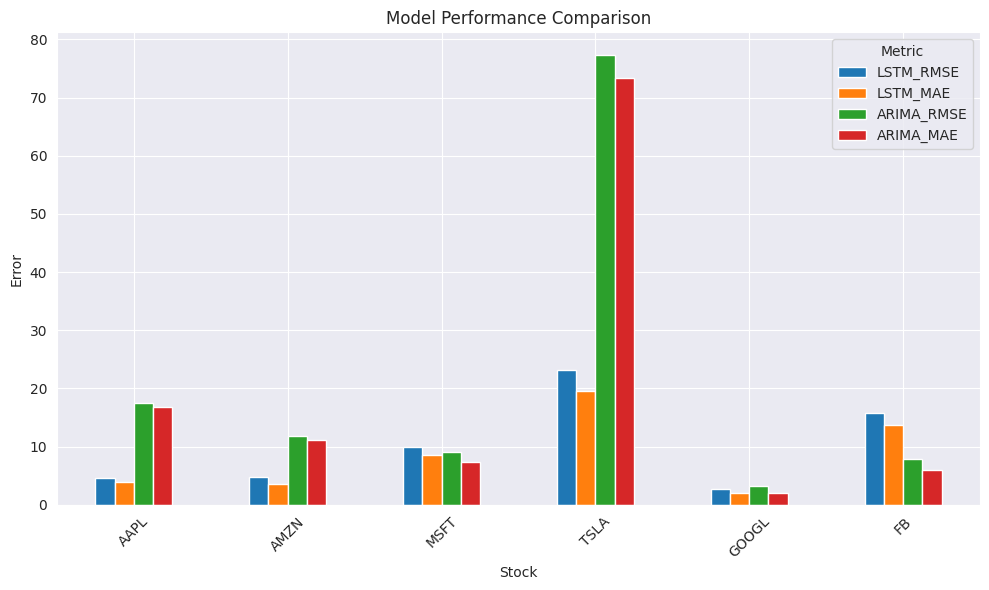

In [56]:
plot_results_barplot(results_df)

In [57]:
def predict_future(ticker, days_ahead, lstm_model, arima_model, scaler, last_sequence, last_value):
    """
    Makes future predictions using trained LSTM and ARIMA models.
    
    Args:
        ticker (str): Stock ticker.
        days_ahead (int): Number of days to predict ahead.
        lstm_model: Trained LSTM model.
        arima_model: Trained ARIMA model.
        scaler: Fitted MinMaxScaler.
        last_sequence: Last sequence of values for LSTM input.
        last_value: Last known price value.
        
    Returns:
        lstm_forecast (np.array): LSTM predictions.
        arima_forecast (np.array): ARIMA predictions.
    """
    # LSTM future prediction
    lstm_input = last_sequence.reshape(1, last_sequence.shape[0], 1)
    lstm_forecast = []
    
    current_batch = lstm_input
    for i in range(days_ahead):
        # Get the prediction for the next timestamp
        current_pred = lstm_model.predict(current_batch)[0]
        # Append to the predictions list
        lstm_forecast.append(current_pred)
        # Update the batch to include the prediction and remove the first value
        current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
    
    # Convert predictions back to original scale
    lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()
    
    # ARIMA future prediction
    arima_forecast = arima_model.predict(n_periods=days_ahead)
    
    return lstm_forecast, arima_forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


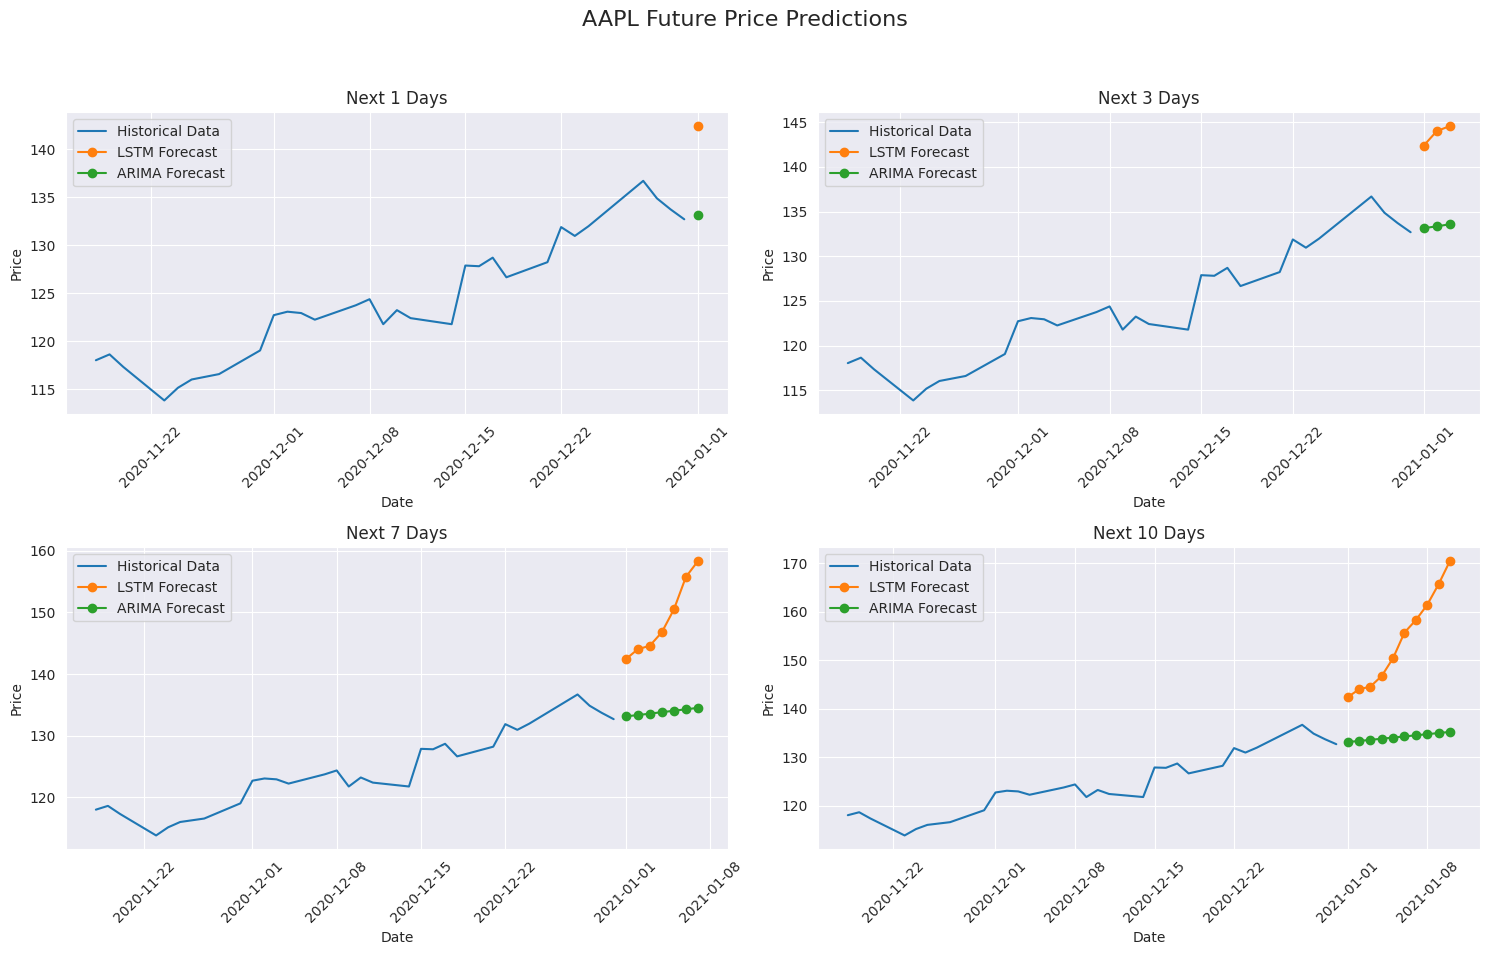

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


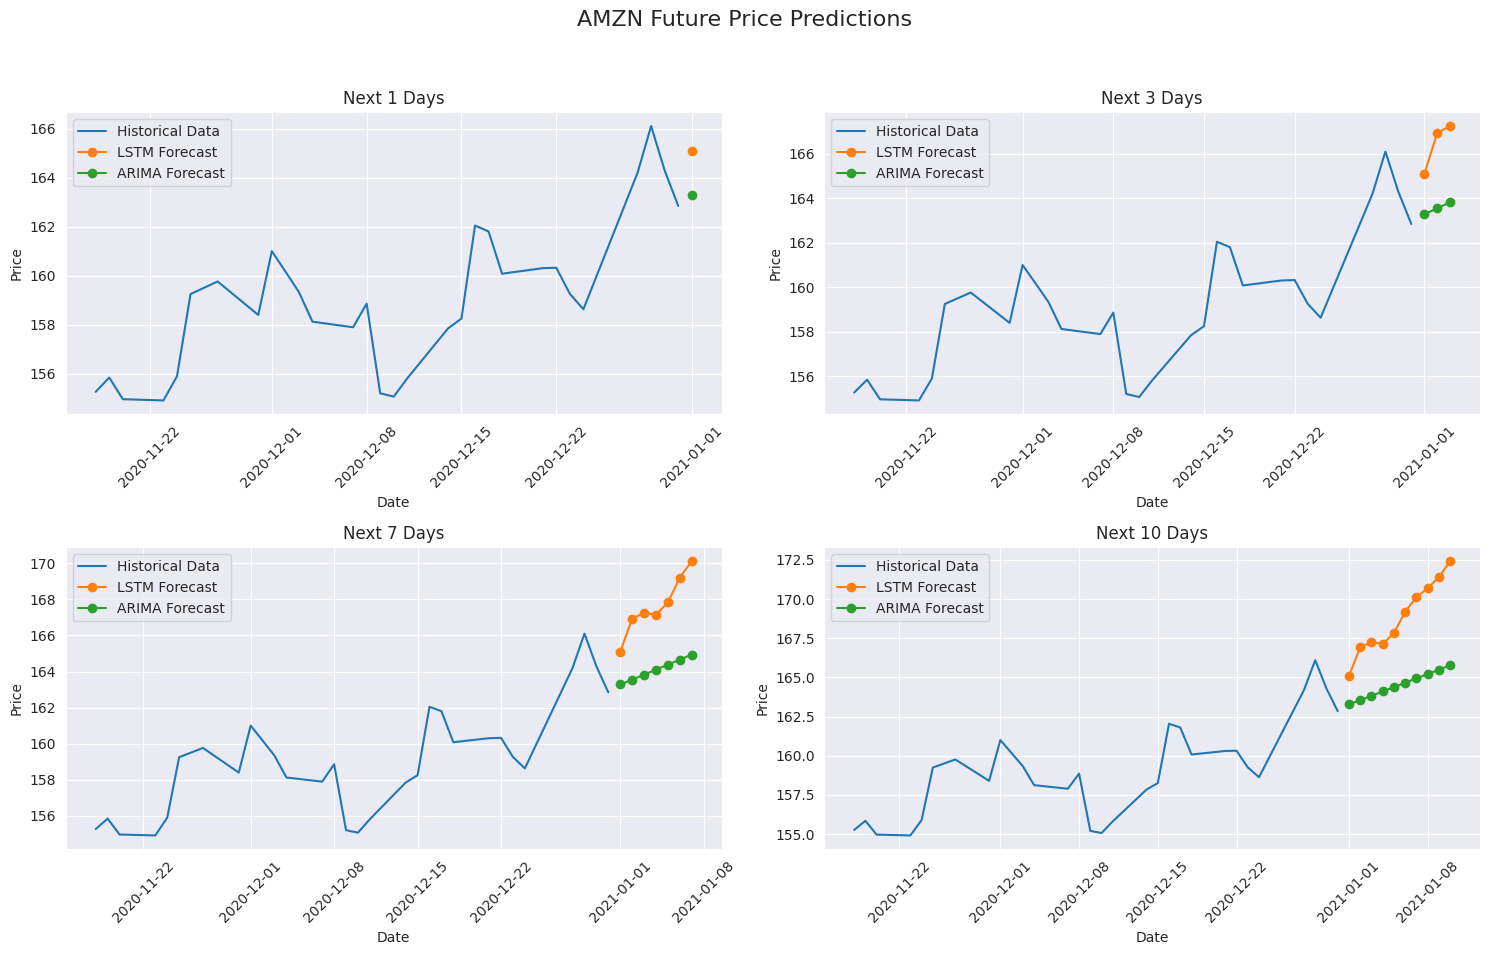

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


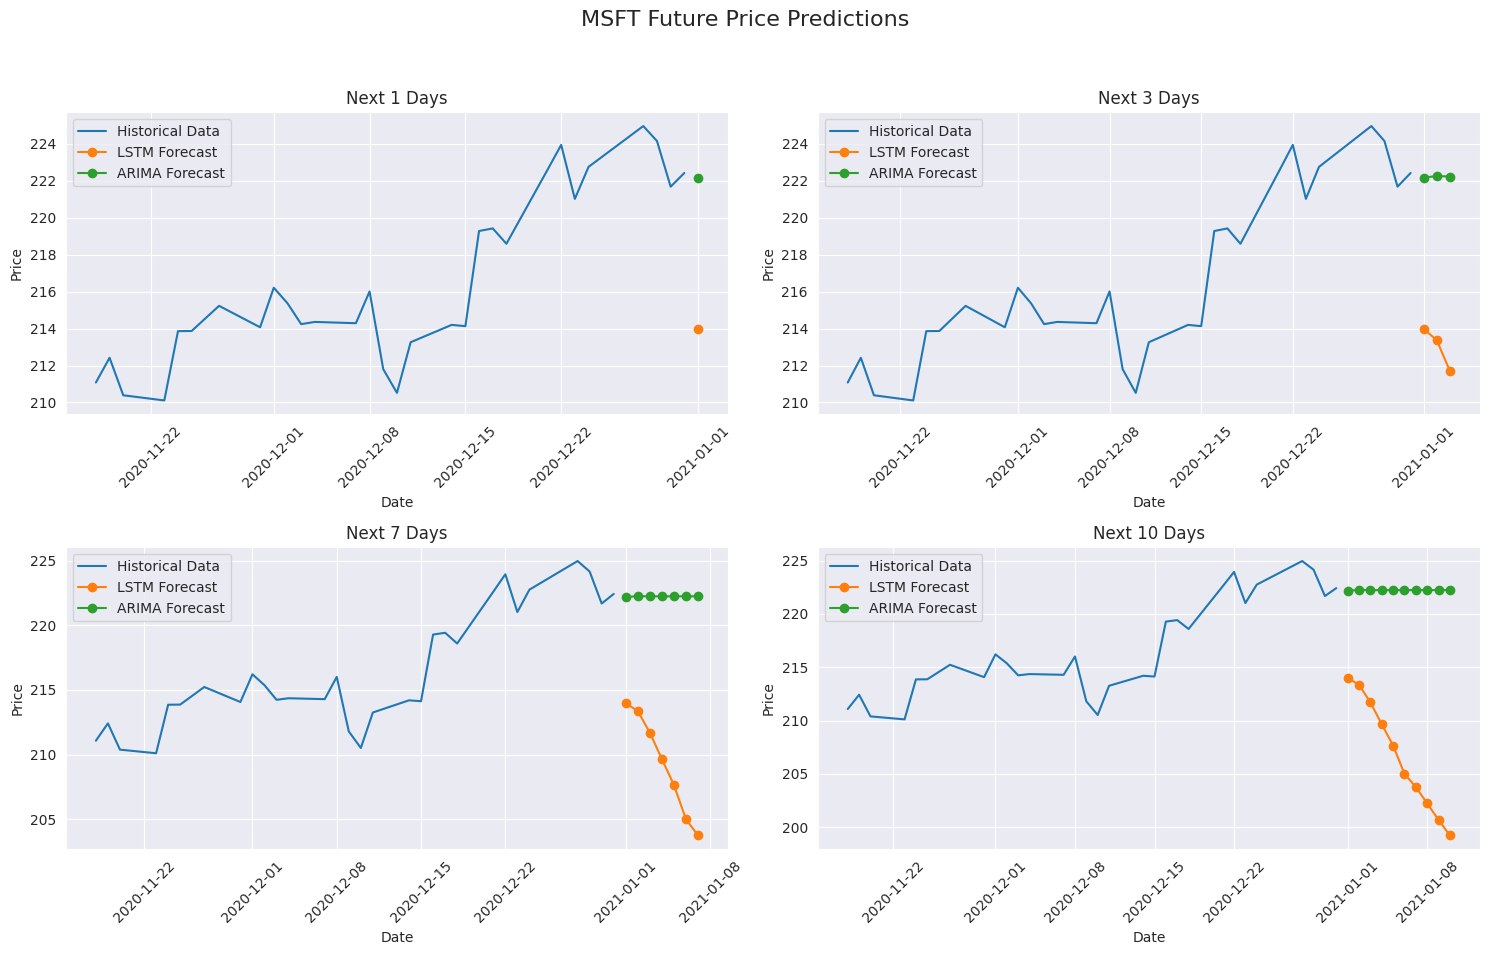

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


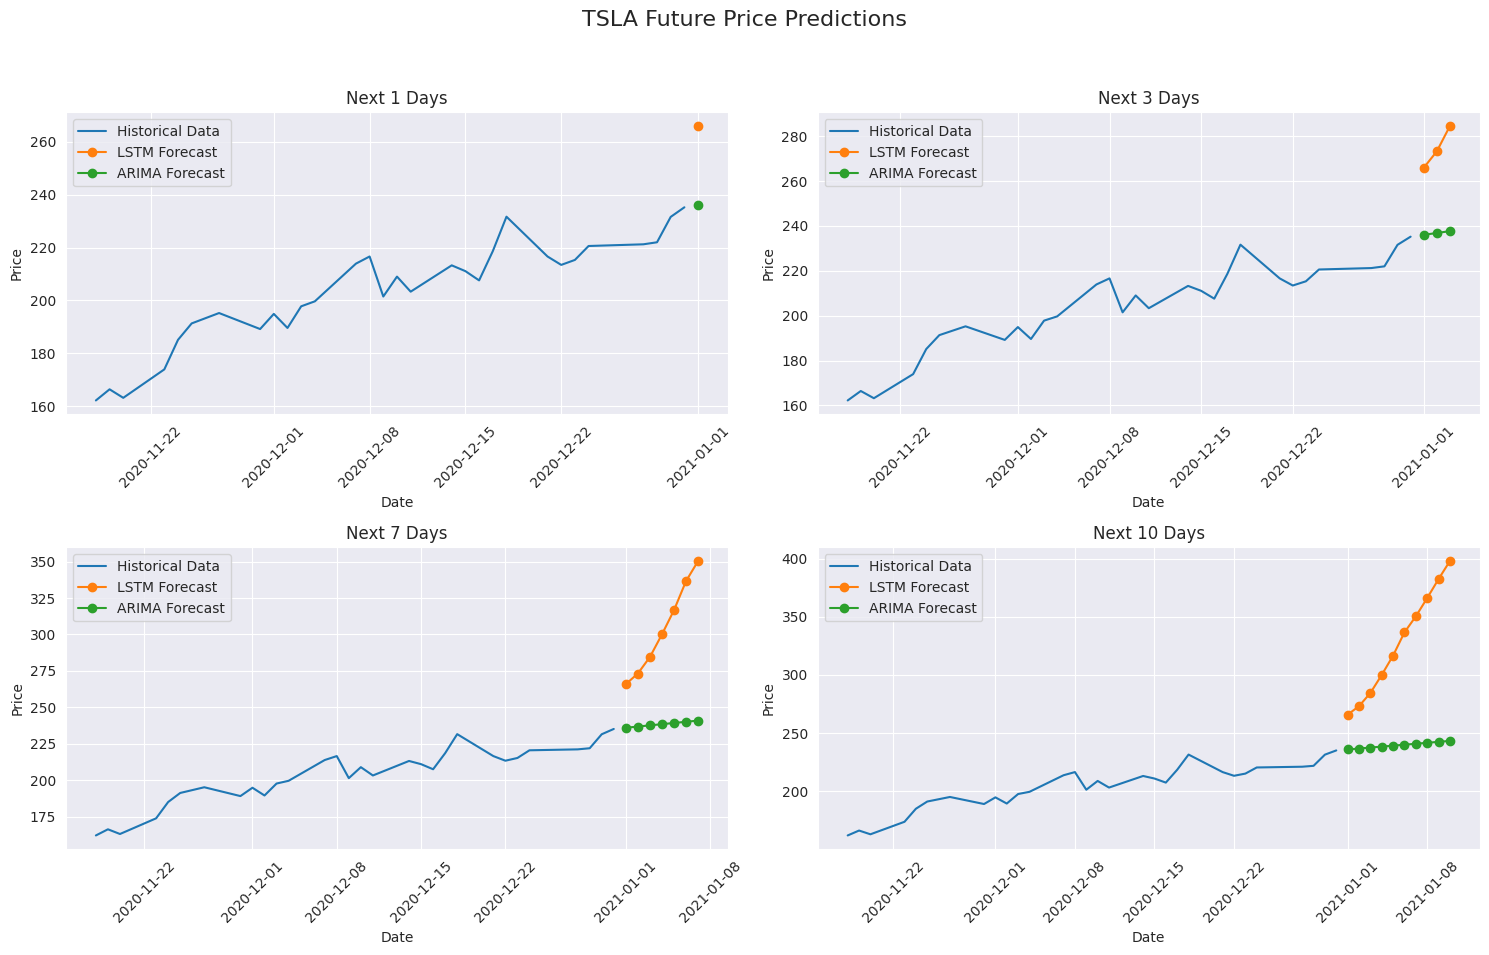

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


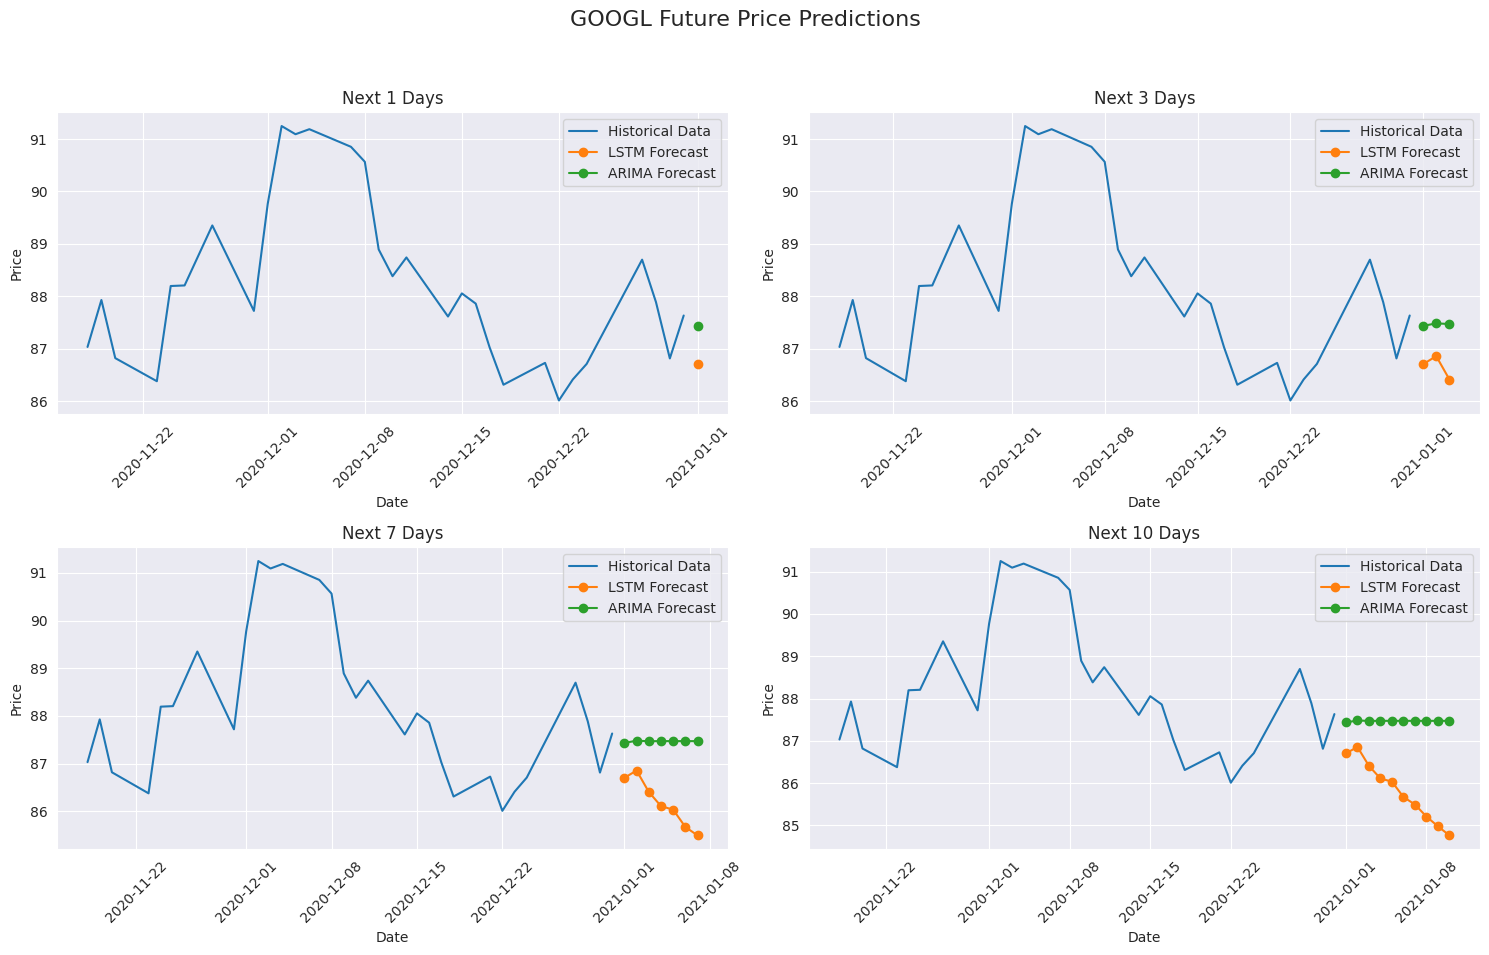

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


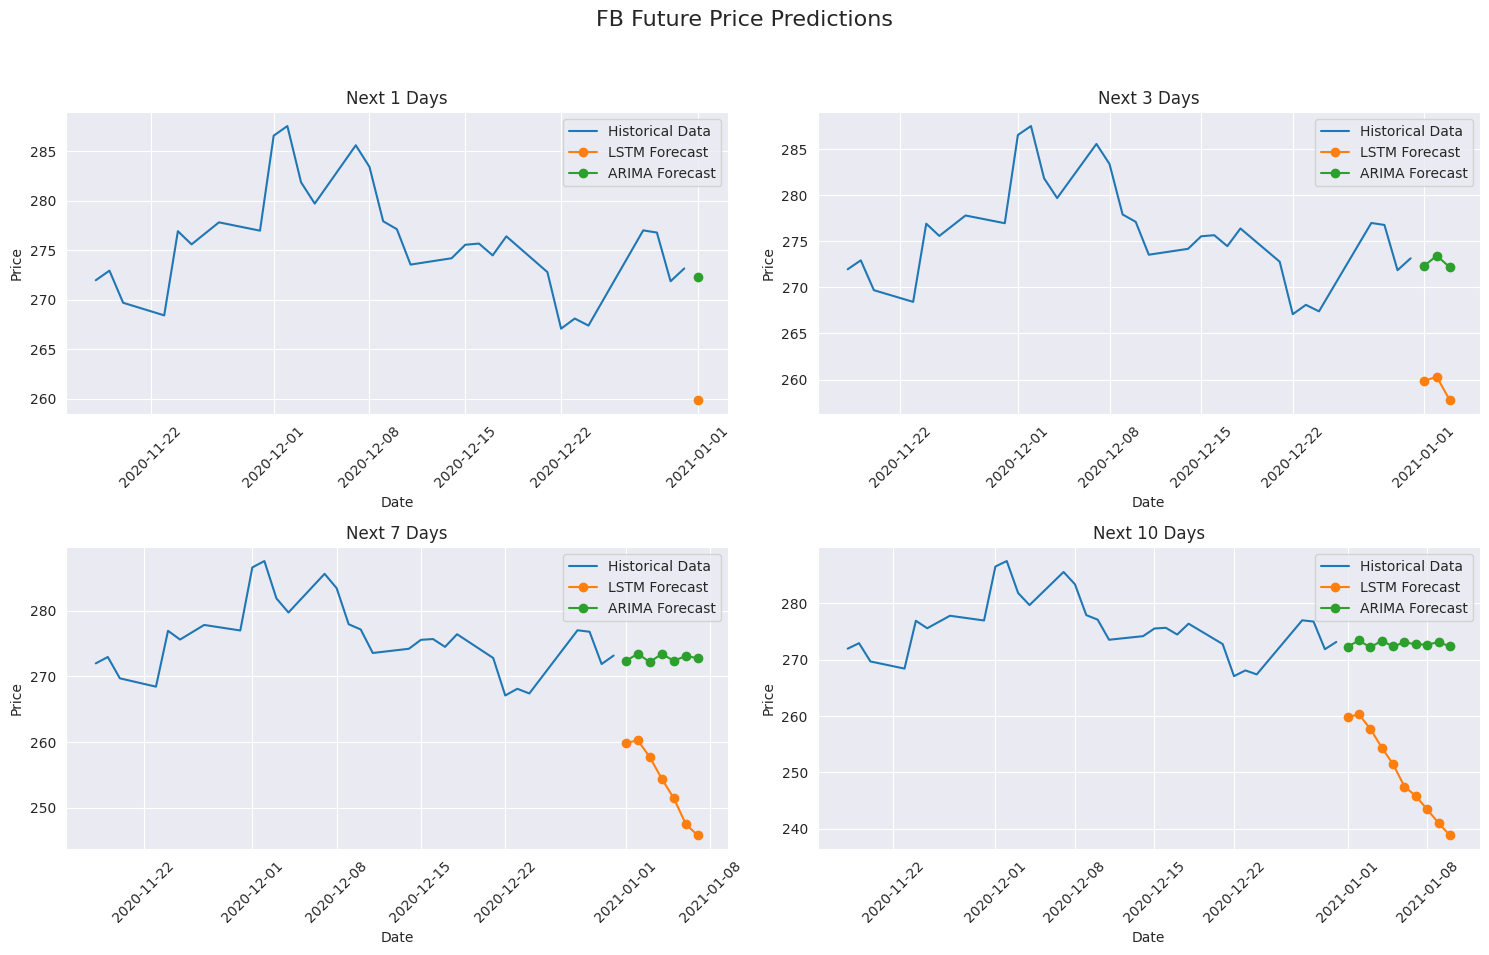

In [58]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'TSLA', 'GOOGL', 'FB']
forecast_days_list = [1, 3, 7, 10]

for ticker in tickers:
    lstm_model, arima_model = trained_models[ticker]
    df = stock_pandas_df[ticker]

    data = df[['Close']].values
    scaled_data = scalers[ticker].transform(data)
    last_sequence = scaled_data[-lookback:, 0]
    last_value = data[-1][0]

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{ticker} Future Price Predictions', fontsize=16)

    for idx, days_to_forecast in enumerate(forecast_days_list):
        row, col = divmod(idx, 2)
        ax = axs[row][col]

        # Make future predictions
        lstm_future, arima_future = predict_future(
            ticker,
            days_to_forecast,
            lstm_model,
            arima_model,
            scalers[ticker],
            last_sequence,
            last_value
        )

        # Plotting
        dates = pd.date_range(start=df['date'].iloc[-1], periods=days_to_forecast + 1)[1:]
        ax.plot(df['date'][-30:], df['Close'][-30:], label='Historical Data')
        ax.plot(dates, lstm_future, 'o-', label='LSTM Forecast')
        ax.plot(dates, arima_future, 'o-', label='ARIMA Forecast')
        ax.set_title(f'Next {days_to_forecast} Days')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
    plt.show()

<h3 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Dashboard</h3>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
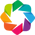

In [59]:
# Enable HoloViews and Panel
hv.extension('bokeh')
pn.extension()

# Define your tickers and forecast days
tickers = ['AAPL', 'AMZN', 'MSFT', 'TSLA', 'GOOGL', 'FB']
forecast_days_list = [1, 3, 7, 10]

# Create interactive widgets
ticker_selector = pn.widgets.Select(name='Select Ticker', options=tickers)
days_selector = pn.widgets.Select(name='Forecast Days', options=forecast_days_list)
model_selector = pn.widgets.CheckBoxGroup(name='Models', options=['LSTM', 'ARIMA'], value=['LSTM', 'ARIMA'])

In [60]:
# Function to generate the forecast plot
@pn.depends(ticker_selector, days_selector, model_selector)
def generate_forecast_plot(ticker, days_to_forecast, models):
    # Get the models and data for selected ticker
    lstm_model, arima_model = trained_models[ticker]
    df = stock_pandas_df[ticker]
    
    # Prepare data for forecasting
    data = df[['Close']].values
    scaled_data = scalers[ticker].transform(data)
    last_sequence = scaled_data[-lookback:, 0]
    last_value = data[-1][0]
    
    # Make predictions
    lstm_future, arima_future = predict_future(
        ticker,
        days_to_forecast,
        lstm_model,
        arima_model,
        scalers[ticker],
        last_sequence,
        last_value
    )
    
    # Create DataFrames for plotting
    history_df = df[['date', 'Close']].rename(columns={'date': 'Date', 'Close': 'Price'})
    history_df['Type'] = 'Historical'
    
    forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=days_to_forecast + 1)[1:]
    
    plot_df = history_df.iloc[-30:].copy()  # Last 30 days of history
    
    # Add forecasts to the plot DataFrame
    if 'LSTM' in models:
        lstm_df = pd.DataFrame({
            'Date': forecast_dates,
            'Price': lstm_future,
            'Type': 'LSTM Forecast'
        })
        plot_df = pd.concat([plot_df, lstm_df])
    
    if 'ARIMA' in models:
        arima_df = pd.DataFrame({
            'Date': forecast_dates,
            'Price': arima_future,
            'Type': 'ARIMA Forecast'
        })
        plot_df = pd.concat([plot_df, arima_df])
    
    # Create the interactive plot
    plot = plot_df.hvplot.line(
        x='Date', 
        y='Price', 
        by='Type',
        line_width=2,
        title=f'{ticker} Price Forecast for Next {days_to_forecast} Days',
        height=500,
        width=800,
        grid=True,
        legend='top_right',
        color=['blue', 'green', 'orange'][:len(models)+1]  # Adjust colors based on selected models
    )
    
    # Add markers for forecast points
    if len(models) > 0:
        forecast_points = plot_df[plot_df['Type'] != 'Historical']
        plot = plot * forecast_points.hvplot.scatter(
            x='Date', 
            y='Price', 
            by='Type',
            size=50,
            legend=False
        )
    
    return plot

In [61]:
# Create a dashboard layout
dashboard = pn.Column(
    pn.Row(
        pn.Column(ticker_selector, days_selector, model_selector),
        pn.pane.Markdown("""
        ## Stock Price Forecast Dashboard
        Select a ticker and forecast period to view predictions from different models.
        """, width=300)
    ),
    generate_forecast_plot
)

# Display the dashboard
dashboard.servable()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Column
    [0] Row
        [0] Column
            [0] Select(options=['AAPL', 'AMZN', ...], value='AAPL')
            [1] Select(name='Forecast Days', options=[1, 3, 7, 10], value=1)
            [2] CheckBoxGroup(name='Models', options=['LSTM', 'ARIMA'], value=['LSTM', 'ARIMA'])
        [1] Markdown(str, width=300)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)